In [1]:
import pandas as pd
import numpy as np
import glob as glob
import os
import re
from rdkit.Chem import rdchem
from multiprocessing import Pool

import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0,'/global/homes/b/bpb/repos/blink')
import blink
sys.path.insert(0,'/global/homes/b/bpb/repos/scndb/')
import scndb.tools as wt

In [2]:
# df = pd.read_csv('../data/public_and_internal_files_with_massive_and_redu.tsv', sep='\t')
# out_dir = '/global/cfs/cdirs/metatlas/projects/carbon_network/raw_data'


In [3]:
df = pd.read_csv('../data/public_and_internal_files_with_massive_and_redu.tsv', sep='\t')
df = df[~df['buddy'].str.contains('qc',case=False)]
df = df[~df['buddy'].str.contains('blank',case=False)]
# df['keywords'] = df['keywords'].apply(lambda x: x.split('###') if type(x)==str else [])
# df['keyword_DOM'] = df['keywords'].apply(lambda x: True if (('dom' in x) | ('organic matter' in x) | ('soil' in x)) else False)
idx1 = (df['in_massive_dom_list'])# | df['keyword_DOM']
# idx2 = df['data_dir']=='/global/cfs/cdirs/metatlas/projects/massive_data_for_scn'
idx3 = df['data_dir']=='/global/cfs/cdirs/metatlas/projects/rawdata_for_scn'
# df = df[(idx3)]# | (idx1)] #  | (idx2)
df = df[(idx3) | (idx1)] #  | (idx2)
# df = df[df['SampleType']=='plant']
df

,no_extension,h5,buddy,data_dir,massive_id,h5_basename,no_extension_basename,redu_filename,title,dataset,...,NCBITaxonomy,SampleExtractionMethod,in_massive_dom_list,num_unique_spectra,num_unique_formula,row_count,hash_value,fraction_within_half_tolerance,total_formula,good_formula
0,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive,MSV000088543,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,f.MSV000088543/ccms_peak/raw_data/20181019_JJ_...,Exometabolomics of Switchgrass rhizosphere,MSV000088543,...,NaN,NaN,True,34,30,368,4543026168108574362794479450808782822576102481...,1.0,34,34
1,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive,MSV000088543,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,f.MSV000088543/ccms_peak/raw_data/20181019_JJ_...,Exometabolomics of Switchgrass rhizosphere,MSV000088543,...,NaN,NaN,True,32,29,368,1146699731202151078167183871657244067319867200...,1.0,32,32
2,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive,MSV000088543,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,f.MSV000088543/ccms_peak/raw_data/20181019_JJ_...,Exometabolomics of Switchgrass rhizosphere,MSV000088543,...,NaN,NaN,True,36,34,368,6050222582699240527582470064019762021131872133...,1.0,36,36
3,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive,MSV000088543,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,f.MSV000088543/ccms_peak/raw_data/20181019_JJ_...,Exometabolomics of Switchgrass rhizosphere,MSV000088543,...,NaN,NaN,True,43,40,368,3702313854198524301531740173462475658596229137...,1.0,43,43
4,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive,MSV000088543,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,f.MSV000088543/ccms_peak/raw_data/20181019_JJ_...,Exometabolomics of Switchgrass rhizosphere,MSV000088543,...,NaN,NaN,True,41,38,368,3204540641109984802875185148711391962459030977...,1.0,41,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9665,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,FRCgw2_20230830,20230831_EB_MdR_101544-059_FRCgw2_20230830_EXP...,20230831_EB_MdR_101544-059_FRCgw2_20230830_EXP...,NaN,NaN,NaN,...,NaN,NaN,False,311,258,2,7691554974928442192395477242826347171018227719...,1.0,311,311
9666,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,OMTSoil50g_Pilot,20240112_JGI_MdR_109570-002_OMTSoil50g_Pilot_Q...,20240112_JGI_MdR_109570-002_OMTSoil50g_Pilot_Q...,NaN,NaN,NaN,...,NaN,NaN,False,740,642,2,2594972266128828903000352158747002890197414379...,1.0,740,740
9667,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,OMTSoil50g_Pilot,20240112_JGI_MdR_109570-002_OMTSoil50g_Pilot_Q...,20240112_JGI_MdR_109570-002_OMTSoil50g_Pilot_Q...,NaN,NaN,NaN,...,NaN,NaN,False,728,64

In [4]:
# import shutil
# out_dir = '/global/cfs/cdirs/metatlas/projects/carbon_network/raw_data'
# for i,row in df.iterrows():
#     f = row['no_extension']
#     all_files = glob.glob('%s.*'%f)
#     for file in all_files:
#         # Define destination file path
#         sub_dir = os.path.dirname(file)
#         sub_dir = '%s%s'%(out_dir,sub_dir)
#         dst_file = os.path.join(sub_dir, os.path.basename(file))
#         if not os.path.isfile(dst_file):
#             os.makedirs(sub_dir, exist_ok=True)
#             # Copy the file
#             shutil.copy2(file, dst_file)

In [5]:
# import subprocess

# out_dir = '/global/cfs/cdirs/metatlas/projects/carbon_network/raw_data/'
# command = ' '.join(["find", "/global/cfs/cdirs/metatlas/projects/carbon_network/raw_data/", "-type", "f", "-name", "*.mzML"])
# result = subprocess.check_output(command, shell=True)

# # Print the output
# print(result)


In [ ]:


# # main_dir = '/pscratch/sd/b/bpb/massive'
# main_dir = '/global/cfs/cdirs/metatlas/projects/rawdata_for_scn'


# mzml_files = glob.glob(main_dir + '/**/*.mzML', recursive=True)
# hdf5_files = glob.glob(main_dir + '/**/*.h5', recursive=True)
# buddy_mdm_files = glob.glob(main_dir + '/**/*.parquet', recursive=True)

# main_dir = '/global/cfs/cdirs/metatlas/projects/massive_data_for_scn'


# mzml_files2 = glob.glob(main_dir + '/**/*.mzML', recursive=True)
# hdf5_files2 = glob.glob(main_dir + '/**/*.h5', recursive=True)
# buddy_mdm_files2 = glob.glob(main_dir + '/**/*.parquet', recursive=True)
# mzml_files = mzml_files + mzml_files2
# hdf5_files = hdf5_files + hdf5_files2
# buddy_mdm_files = buddy_mdm_files + buddy_mdm_files2

# # df = pd.DataFrame({'mzml': mzml_files})
# df = pd.DataFrame({'h5': hdf5_files})
# df['mzml'] = df['h5'].apply(lambda x: x.replace('.h5', '.mzML'))

# # df['h5'] = df['mzml'].apply(lambda x: x.replace('.mzML', '.h5'))
# df['buddy'] = df['mzml'].apply(lambda x: x.replace('.mzML', '.parquet'))
# df['h5_completed'] = df['h5'].apply(lambda x: os.path.exists(x))
# df['buddy_completed'] = df['buddy'].apply(lambda x: os.path.exists(x))
# df['h5_failed'] = df['h5'].apply(lambda x: os.path.exists('%s-failed'%x))
# df['buddy_failed'] = df['buddy'].apply(lambda x: os.path.exists('%s-failed'%x))
# df


In [6]:
formula_df = pd.read_csv('/global/homes/b/bpb/repos/scndb/data/merged_fticr_formula (2).csv')
formula_df.drop(columns=['Unnamed: 0'], inplace=True)
# Add new columns for each unique value in "environment type"
# cols = ['formula','environment_type']
# formula_df = pd.pivot_table(formula_df[cols], index='formula', columns='environment_type', aggfunc=lambda x: True, fill_value=False)
cols =  ['environment_type', 'extraction_solvent',
       'ppl_extracted', 'instrument_type',
       'mass_range', 'doi']
for c in cols:
    env = formula_df.groupby(['formula',c])['polarity'].count().unstack().fillna(0)
    env[env>0] = 1
    env.columns = ['%s:%s'%(c,x) for x in env.columns]
    env = env.astype(int)
    formula_df = formula_df.merge(env, left_on='formula', right_index=True)
    formula_df.drop(columns=c, inplace=True)
    print(c)
formula_df.drop_duplicates(subset='formula', inplace=True)
formula_df.reset_index(drop=True, inplace=True)

formula_df.drop(columns=['mz','ionization_method','polarity'],inplace=True)

formula_df

environment_type
extraction_solvent
ppl_extracted
instrument_type
mass_range
doi


,formula,environment_type:aquatic,environment_type:soil,environment_type:wetland,extraction_solvent:chloroform,extraction_solvent:methanol-water,extraction_solvent:water,ppl_extracted:False,ppl_extracted:True,instrument_type:12 Tesla FT-ICR-MS,instrument_type:15 Tesla FT-ICR-MS,mass_range:100-900,mass_range:125-2000,mass_range:150-2000,mass_range:200-1200,doi:https://doi.org/10.1016/j.gca.2021.10.018,doi:https://doi.org/10.1038/s41467-018-05665-9,doi:https://doi.org/10.1371/journal.pone.0119188,doi:https://doi.org/10.5194/bg-16-3911-2019
0,C6H5NO4,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0
1,C6H4O5,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0
2,C6H6O5,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0
3,C6H8O5,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0
4,C10H8O2,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15783,C20H19N1O11,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
15784,C19H19N1O12,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
15785,C20H19N1O12,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
15786,C28H22O17,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0


In [ ]:
# df = df[df['buddy_completed']]

In [ ]:
# sample_info = pd.read_csv('../data/all_sampleinformation.tsv', sep='\t')
# sample_info.head()
# sample_info['basename'] = sample_info['filename'].apply(lambda x: os.path.basename(x))
# df['basename'] = df['mzml'].apply(lambda x: os.path.basename(x))

# df = pd.merge(df,sample_info, left_on='basename', right_on='basename',how='left')



In [ ]:
# df['SampleType'].fillna('').value_counts()

In [ ]:
mz_tol = 0.002
deltas = pd.read_csv('../data/mdm_neutral_losses.csv')
ref,ref2 = wt.get_p2d2(deltas,mz_tol=mz_tol)
print(ref.shape)
# ref = ref[ref['formula'].isin(formula_df['formula'])]
ref.reset_index(inplace=True,drop=True)
# ref2 = ref2[ref2['formula'].isin(formula_df['formula'])]
ref2.reset_index(inplace=True,drop=True)
print(ref.shape)
ref_spec = ref['spectrum'].tolist()
ref_pmz = ref['precursor_mz'].tolist()

ref_spec_nl = ref2['nl_spectrum'].tolist()
ref_pmz_nl = ref2['precursor_mz'].tolist()

def score_df(df):
    min_matches=3,
    min_score=0.7,
    override_matches=20

    
    q_cols = ['predicted_formula','precursor_mz']
    r_cols = ['original_p2d2_index', 'formula','precursor_mz', 'inchi_key','name']
    # q = q[q['predicted_formula'].isin(ref['formula'])].copy()
    # q = query.head(10000)
    if df.shape[0]==0:
        return None
    if 'mdm_mz_vals' not in df.columns:
        return None
    df['num_mdm_frags'] = df['mdm_mz_vals'].apply(lambda x: len(x) if type(x)!=float else 0)

    df = df[df['num_mdm_frags']>0]
    df.reset_index(inplace=True,drop=True)
    df.index.name = 'original_index'
    df.reset_index(inplace=True,drop=False)

    df['nl_spectrum'] = df.apply(lambda x: np.asarray([x['mdm_mz_vals'],x['mdm_i_vals']]),axis=1)
    df['original_spectrum'] = df.apply(lambda x: np.asarray([x['original_mz_vals'],x['original_i_vals']]),axis=1)

    query_spec = df['original_spectrum'].tolist()
    query_pmz = df['precursor_mz'].tolist()
    query_spec_nl = df['nl_spectrum'].tolist()
    query_pmz_nl = df['precursor_mz'].tolist()

    d_specs = blink.discretize_spectra(query_spec,  ref_spec, query_pmz, ref_pmz, intensity_power=0.5, bin_width=0.001, tolerance=0.01,network_score=False)#,mass_diffs=mass_diffs)
    d_specs_nl = blink.discretize_spectra(query_spec_nl,  ref_spec_nl, query_pmz_nl, ref_pmz_nl, intensity_power=0.5, bin_width=0.001, tolerance=0.01,network_score=False)#,mass_diffs=mass_diffs)
    
    def score_and_filter(specs,r,q,mz_tol=0.002,min_score=0.7,min_matches=3,override_matches=20,
                         q_cols=['predicted_formula','precursor_mz'],
                         r_cols=['original_p2d2_index', 'formula','precursor_mz', 'inchi_key','name']):
        scores = blink.score_sparse_spectra(specs)
        filtered_scores = blink.filter_hits(scores,min_score=min_score,min_matches=min_matches,override_matches=override_matches,)
        mz_df = blink.reformat_score_matrix(filtered_scores)
        mz_df = blink.make_output_df(mz_df)
        for c in mz_df.columns:
            mz_df[c] = mz_df[c].sparse.to_dense()

        mz_df = pd.merge(mz_df,q[q_cols],left_on='query',right_index=True)
        mz_df = pd.merge(mz_df,r[r_cols].add_suffix('_ref'),left_on='ref',right_index=True)
        # mz_df = mz_df[mz_df['predicted_formula']==mz_df['formula']]
        mz_df = mz_df[abs(mz_df['precursor_mz']-mz_df['precursor_mz_ref'])<mz_tol]
        # mz_df.sort_values('score',ascending=False,inplace=True)
        # mz_df.drop_duplicates('inchi_key_ref',keep='first',inplace=True)
        return mz_df
    orig_hits = score_and_filter(d_specs,ref,df,mz_tol=mz_tol,min_score=0.7,min_matches=3,override_matches=20,
                             q_cols=['predicted_formula','precursor_mz'],
                             r_cols=['original_p2d2_index', 'formula','precursor_mz', 'inchi_key','name'])
    nl_hits = score_and_filter(d_specs_nl,ref2,df,mz_tol=mz_tol,min_score=0.7,min_matches=3,override_matches=20,
                             q_cols=['predicted_formula','precursor_mz'],
                             r_cols=['original_p2d2_index', 'formula','precursor_mz', 'inchi_key','name'])
    temp = pd.merge(nl_hits,orig_hits,on=['query','original_p2d2_index_ref'],how='outer',suffixes=('_original','_nl'))
    if temp.shape[0]==0:
        return None
    temp['max_score'] = temp[['score_original','score_nl']].max(axis=1)
    temp['best_match_method'] = temp[['score_original','score_nl']].idxmax(axis=1)
    temp.sort_values('max_score',ascending=False,inplace=True)
    temp = temp[temp['max_score']>min_score]  #filter on score
    temp['max_matches'] = 0
    idx = temp['best_match_method']=='score_original'
    temp.loc[idx,'max_matches'] = temp.loc[idx,'matches_original']
    idx = temp['best_match_method']=='score_nl'
    temp.loc[idx,'max_matches'] = temp.loc[idx,'matches_nl']
    temp = temp[temp['max_matches']>=min_matches]  #filter on matches


    cols = ['score_original','matches_original', 'score_nl', 'matches_nl']
    temp.drop(columns=cols,inplace=True)
    temp = pd.merge(temp,df[['original_index','precursor_mz','coisolated_precursor_count']].add_suffix('_query'),left_on='query',right_index=True)

    idx_isolated = (temp['coisolated_precursor_count_query']>1) & (temp['best_match_method']=='score_original')
    temp = temp[~idx_isolated] #filter on isolated precursor

    cols = ['name', 'inchi_key', 'smiles','formula','precursor_mz','original_p2d2_index']
    temp = pd.merge(temp,ref[cols],left_on='original_p2d2_index_ref',right_on='original_p2d2_index',how='left')

    idx_precursor = (abs(temp['precursor_mz_query']-temp['precursor_mz'])<mz_tol)
    temp = temp[idx_precursor] #filter on precursor m/z

    temp.sort_values('max_score',ascending=False,inplace=True)

    temp = temp.groupby('query').head(1)
    temp.reset_index(inplace=True,drop=True)
    
    df = pd.merge(df,temp.add_suffix('_identity'),left_on='original_index',right_on='original_index_query_identity',how='left')
    # df.drop(columns=['original_index_query_analog','original_p2d2_index','query'],inplace=True)

    cols = ['original_index_query_identity',
            'query_identity',
            'precursor_mz_query_identity',
            'coisolated_precursor_count_query_identity']
    df.drop(columns=cols,inplace=True)
    df.sort_values('max_score_identity',ascending=False,inplace=True)
    df.drop_duplicates('inchi_key_identity',keep='first',inplace=True)
    df = df[df['max_score_identity']>0]
    if df.shape[0]==0:
        return None
    return df





def calculate_mass(formula):
    # Regular expression to match elements and their counts
    pattern = r'([A-Z][a-z]*)(\d*)'    
    mass = 0
    pt = rdchem.GetPeriodicTable()

    for el, count in re.findall(pattern, formula):
        # If count is an empty string, it means there's only one atom of this element
        count = int(count) if count else 1
        mass += pt.GetMostCommonIsotopeMass(el) * count
    return mass

def process_row(row):
    row = row[-1]
    temp = pd.read_parquet(row['buddy'])
    if temp.shape[0]>0:
        temp['predicted_mass'] = temp['predicted_formula'].apply(lambda x: calculate_mass(x))
        temp['predicted_mass'] = temp['predicted_mass'] - 1.007276
        temp['mass_error'] = temp['precursor_mz'] - temp['predicted_mass']
        count_good = temp[temp['mass_error'].abs() < 0.001].shape[0] #0.002 was the parameter used in the original code
        fraction_good = count_good / temp.shape[0]
        temp = score_df(temp)
    else:
        count_good = 0
        fraction_good = 0
    return temp#{'fraction_within_half_tolerance':fraction_good,'total_formula':temp.shape[0],'good_formula':count_good}

with Pool(20) as pool:
    out = pool.map(process_row, df.iterrows())
# out = []
# for (i,row) in df.iterrows():
#     t = process_row(row)
#     if t is not None:
#         out.append(t)
#     # break
out = [o for o in out if o is not None]
out = pd.concat(out)
out.reset_index(inplace=True,drop=True)
df = pd.merge(df, out, left_on='h5', right_on='filename', how='outer')
# df = pd.concat([df, out], axis=1)
df.reset_index(inplace=True,drop=True)
# df.index.name = 'original_index'
# df.reset_index(inplace=True,drop=False)
# df
# out = process_row([0,df.loc[9667]])
# out = out[out['formula'].isin(formula_df['formula'])]
df

In [ ]:
# df.sort_values('max_score_identity',ascending=False,inplace=True)
# df.drop_duplicates('inchi_key_identity',keep='first',inplace=True)
# # out['best_match_method_identity'].value_counts()
# idx = out['formula_identity'].isin(formula_df['formula'])
# out.loc[idx,'inchi_key_identity'].nunique()

In [ ]:
# df['num_mdm_frags'] = df['mdm_mz_vals'].apply(lambda x: len(x) if type(x)!=float else 0)

# df = df[df['num_mdm_frags']>0]

In [ ]:
# temp = pd.merge(df,formula_df,left_on='formula_identity',right_on='formula',how='left')
df['isin_fticr_formula'] = df['formula_identity'].isin(formula_df['formula'])
# print(len(df.loc[df['isin_fticr_formula'],'predicted_formula'].unique()),len(df['predicted_formula'].unique()),len(formula_df['formula'].unique()))

In [ ]:

# # df = df[df['isin_fticr_formula']]
# df['nl_spectrum'] = df.apply(lambda x: np.asarray([x['mdm_mz_vals'],x['mdm_i_vals']]),axis=1)
# df['original_spectrum'] = df.apply(lambda x: np.asarray([x['original_mz_vals'],x['original_i_vals']]),axis=1)
# # print(len(df.loc[df['isin_fticr_formula'],'predicted_formula'].unique()),len(df['predicted_formula'].unique()),len(formula_df['formula'].unique()))



In [ ]:
# out = score_df(df.sample(10000))
# out

In [ ]:
# mz_tol = 0.002
# deltas = pd.read_csv('../data/mdm_neutral_losses.csv')
# ref,ref2 = wt.get_p2d2(deltas,mz_tol=mz_tol)
# ref = ref[ref['formula'].isin(df['predicted_formula'])]
# ref2 = ref2[ref2['formula'].isin(df['predicted_formula'])]
# ref = ref[ref['formula'].isin(formula_df['formula'])]
# ref2 = ref2[ref2['formula'].isin(formula_df['formula'])]



In [ ]:
# idx = df['predicted_formula'].isin(ref['formula'])
# query_spec = df.loc[idx,'original_spectrum'].tolist()
# query_pmz = df.loc[idx,'precursor_mz'].tolist()
# idx = df['predicted_formula'].isin(ref2['formula'])
# query_spec_nl = df.loc[idx,'nl_spectrum'].tolist()
# query_pmz_nl = df.loc[idx,'precursor_mz'].tolist()

# ref_spec = ref['spectrum'].tolist()
# ref_pmz = ref['precursor_mz'].tolist()

# ref_spec_nl = ref2['nl_spectrum'].tolist()
# ref_pmz_nl = ref2['precursor_mz'].tolist()

# # polarity = 'negative'
# # # import pickle as pickle
# # from joblib import load

# # with open('/global/homes/b/bpb/repos/blink/models/{}_random_forest.joblib'.format(polarity), 'rb') as out:
# #     regressor = load(out)

# # mass_diffs = [0, 14.0157, 12.000, 15.9949, 2.01565, 27.9949, 26.0157, 18.0106, 30.0106, 42.0106, 1.9792, 17.00284, 24.000, 13.97925, 1.00794, 40.0313]#, 43.993]

# d_specs = blink.discretize_spectra(query_spec,  ref_spec, query_pmz, ref_pmz, intensity_power=0.5, bin_width=0.001, tolerance=0.01,network_score=False)#,mass_diffs=mass_diffs)
# d_specs_nl = blink.discretize_spectra(query_spec_nl,  ref_spec_nl, query_pmz_nl, ref_pmz_nl, intensity_power=0.5, bin_width=0.001, tolerance=0.01,network_score=False)#,mass_diffs=mass_diffs)

In [ ]:
# print(df.shape)
# df = df[~df['predicted_formula'].str.contains('P|N|S')]
# print(df.shape)
# print(len(df.loc[df['isin_fticr_formula'],'predicted_formula'].unique()),len(df['predicted_formula'].unique()),len(formula_df['formula'].unique()))


In [ ]:

def filter_assets(df,group_term='buddy'):
    df = df[pd.notna(df['formula_identity'])]
    result_true = df[df['isin_fticr_formula'] == True].groupby(group_term)['formula_identity'].nunique()
    result_false = df[df['isin_fticr_formula'] == False].groupby(group_term)['formula_identity'].nunique()
    combined_result = pd.concat([result_true, result_false], axis=1)
    combined_result.columns = ['result_true', 'result_false']

    combined_result.fillna(0, inplace=True)
    combined_result['fraction_true'] = combined_result['result_true'] / (combined_result['result_true'] + combined_result['result_false'])
    combined_result.reset_index(inplace=True,drop=False)
    # Extract the 'fraction_true' values
    fraction_true_values = combined_result['fraction_true'].values.reshape(-1, 1)

    # Fit a Gaussian Mixture Model with 2 components
    gmm = GaussianMixture(n_components=2, means_init=np.array([[0.3], [0.7]]))
    gmm.fit(fraction_true_values)

    # Get the means of the two Gaussian distributions
    means = gmm.means_

    # Print the means
    print("Mean of the first Gaussian distribution:", means[0][0])
    print("Mean of the second Gaussian distribution:", means[1][0])

    cluster_labels = gmm.predict(fraction_true_values)

    # Separate the two populations based on the cluster labels
    population1 = fraction_true_values[cluster_labels == 0]
    population2 = fraction_true_values[cluster_labels == 1]
    min_val = fraction_true_values[cluster_labels == 1].min()
    print("Minimum value of the higher distribution:", fraction_true_values[cluster_labels == 1].min())



    # Plot the two populations
    plt.hist(population1, bins=np.linspace(0,1,30), alpha=0.5, label='Population 1')
    plt.hist(population2, bins=np.linspace(0,1,30), alpha=0.5, label='Population 2')
    plt.xlabel('fraction_true')
    plt.ylabel('Count')
    plt.legend()
    plt.show()


    good_files = combined_result.loc[combined_result['fraction_true'] > min_val, 'buddy'].tolist()
    
    return good_files

good_files = filter_assets(df)
print(df.shape, len(good_files),len(df['buddy'].unique()))
df = df[df['buddy'].isin(good_files)]
print(df.shape, len(good_files),len(df['buddy'].unique()))

In [ ]:
# unique_massive_ids = df.groupby('formula_identity')['massive_id'].nunique()
# unique_massive_ids = unique_massive_ids[unique_massive_ids>1]
# # fig,ax = plt.subplots()
# # ax.hist(unique_massive_ids,bins=100)
# # unique_massive_ids
# # ax.set_yscale('log')
# # ax.set_xscale('log')
# # plt.show()
# df = df[df['predicted_formula'].isin(unique_massive_ids.index)]

In [ ]:
# result_true = df[df['isin_fticr_formula'] == True].groupby('buddy')['predicted_formula'].nunique()
# result_false = df[df['isin_fticr_formula'] == False].groupby('buddy')['predicted_formula'].nunique()
# combined_result = pd.concat([result_true, result_false], axis=1)
# combined_result.columns = ['result_true', 'result_false']

# combined_result.fillna(0, inplace=True)
# combined_result.reset_index(inplace=True,drop=False)

# # combined_result = combined_result[combined_result['result_true'] + combined_result['result_false'] > 1000]
# combined_result = combined_result[combined_result['buddy'].str.contains('MSV000088823')]
# combined_result['buddy'] = combined_result['buddy'].apply(lambda x: os.path.basename(x).replace('.parquet','').replace('DOM_Interlab-LCMS_',''))
# combined_result.sort_values('result_true',ascending=True,inplace=True)
# combined_result['fraction_true'] = combined_result['result_true'] / (combined_result['result_true'] + combined_result['result_false'])
# combined_result.reset_index(inplace=True)
# import matplotlib.pyplot as plt
# fig,ax = plt.subplots(figsize=(18,8))
# combined_result.plot(x='buddy', y=['result_true', 'result_false'], kind='bar',ax=ax,stacked=True)
# # plt.xlabel('Massive ID')
# ax.set_ylabel('Number of Unique Predicted Formulas')
# # plt.title('Number of Unique Predicted Formulas by Massive ID')
# plt.legend(['In FTICR', 'Not In FTICR'])
# plt.tight_layout()
# # combined_result.plot(x='massive_id', y=['result_true', 'result_false'], kind='bar', ax=ax, stacked=True)

# # Add "*" above bars with 'fraction_true' less than 0.2
# for i, row in combined_result.iterrows():
#     if row['fraction_true'] < 0.20:
#         ax.text(i, 1.00*(row['result_true'] + row['result_false']), "*", ha='center', va='bottom',fontsize=24)
#         # ax.text(i,1,'*')

# ax.set_ylabel('Number of Unique Predicted Formulas')
# plt.legend(['In FTICR', 'Not In FTICR'])
# plt.tight_layout()

# plt.show()


In [ ]:
temp = df[pd.notna(df['formula_identity'])]
k = 'inchi_key_identity'
# k = 'formula_identity'
result_true = temp[temp['isin_fticr_formula'] == True].groupby('massive_id')[k].nunique()
result_false = temp[temp['isin_fticr_formula'] == False].groupby('massive_id')[k].nunique()
combined_result = pd.concat([result_true, result_false], axis=1)
combined_result.columns = ['result_true', 'result_false']
combined_result.fillna(0, inplace=True)

combined_result.sort_values('result_true',ascending=True,inplace=True)
combined_result['fraction_true'] = combined_result['result_true'] / (combined_result['result_true'] + combined_result['result_false'])
combined_result.reset_index(inplace=True)
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(18,8))
combined_result.plot(x='massive_id', y=['result_true', 'result_false'], kind='bar',width=0.9,ax=ax,stacked=True)
# plt.xlabel('Massive ID')



# Add "*" above bars with 'fraction_true' less than 0.2
for i, row in combined_result.iterrows():
    if row['fraction_true'] < 0.20:
        ax.text(i, 1.00*(row['result_true'] + row['result_false']), "*", ha='center', va='bottom',fontsize=24)
        # ax.text(i,1,'*')

ax.set_ylabel('Number of Unique MS2\nIdentity Matches',fontsize=20)
ax.set_xlabel('')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

plt.legend(['True', 'False'],title='In FT-ICR EOM',fontsize=18,title_fontsize=18)
plt.tight_layout()

plt.show()


In [ ]:
df.sort_values('max_score_identity',ascending=False,inplace=True)
df.drop_duplicates('inchi_key_identity',keep='first',inplace=True)

In [ ]:
# df.to_pickle('top_scoring_inchikey_lbl.pkl')

In [2]:
df = pd.read_pickle('top_scoring_inchikey.pkl')
all_df = pd.read_pickle('/global/cfs/cdirs/metatlas/projects/spectral_libraries/temp_backup.pkl')

# df = pd.read_pickle('top_scoring_inchikey_lbl.pkl')
# all_df = pd.read_pickle('/global/cfs/cdirs/metatlas/projects/spectral_libraries/temp_backup_lbl.pkl')

all_df['nl_spectrum'] = all_df.apply(lambda x: np.asarray([x['mdm_mz_vals'],x['mdm_i_vals']]),axis=1)

all_df['sum_frag_intensity'] = all_df['mdm_i_vals'].apply(lambda x: np.sum(x))
all_df['original_spectrum'] = all_df['nl_spectrum']#df.apply(lambda x: np.asarray([x['original_mz_vals'],x['original_i_vals']]),axis=1)
all_df = all_df[all_df['sum_frag_intensity']>0]
all_df = all_df[pd.notna(all_df['predicted_formula'])]
all_df = all_df[all_df['massive_id'].isin(df['massive_id'])]
df['num_mdm_frags'] = df['mdm_mz_vals'].apply(lambda x: len(x))
all_df

,no_extension,h5,buddy,data_dir,massive_id,h5_basename,no_extension_basename,redu_filename,title,dataset,...,original_i_vals,predicted_formula,estimated_fdr,predicted_mass,mass_error,ms2_mz_vals,ms2_i_vals,nl_spectrum,sum_frag_intensity,original_spectrum
0,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive,MSV000088543,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,f.MSV000088543/ccms_peak/raw_data/20181019_JJ_...,Exometabolomics of Switchgrass rhizosphere,MSV000088543,...,"[462166.65625, 206324.203125, 276785.5, 56654....",C7H14N2O4S,0.000000,221.060152,-0.000458,NaN,NaN,"[[177.0698699951172, 193.06468200683594, 195.0...",1.238616e+07,"[[177.0698699951172, 193.06468200683594, 195.0..."
1,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive,MSV000088543,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,f.MSV000088543/ccms_peak/raw_data/20181019_JJ_...,Exometabolomics of Switchgrass rhizosphere,MSV000088543,...,"[38185.5859375, 5534106.5, 2194544.25, 80258.8...",CH7N4O3P,0.000000,153.018301,-0.000512,NaN,NaN,"[[65.03784942626953, 91.01720428466797, 109.02...",8.319949e+06,"[[65.03784942626953, 91.01720428466797, 109.02..."
2,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive,MSV000088543,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,f.MSV000088543/ccms_peak/raw_data/20181019_JJ_...,Exometabolomics of Switchgrass rhizosphere,MSV000088543,...,"[727181.625, 44015.3125, 42669.6484375, 49133....",C8H4OS2,0.000000,178.963081,0.000839,NaN,NaN,"[[55.017250061035156, 71.0121841430664, 176.94...",8.202274e+06,"[[55.017250061035156, 71.0121841430664, 176.94..."
3,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive,MSV000088543,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,f.MSV000088543/ccms_peak/raw_data/20181019_JJ_...,Exometabolomics of Switchgrass rhizosphere,MSV000088543,...,"[6075.94775390625, 3627.46142578125, 12005.785...",C10H10S,0.000000,161.043045,0.000926,NaN,NaN,"[[85.02783966064453, 99.04350280761719, 119.03...",3.716612e+06,"[[85.02783966064453, 99.04350280761719, 119.03..."
4,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive/v01/MSV000088543/cc...,/pscratch/sd/b/bpb/massive,MSV000088543,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,f.MSV000088543/ccms_peak/raw_data/20181019_JJ_...,Exometabolomics of Switchgrass rhizosphere,MSV000088543,...,"[156714.0625, 887873.125, 805822.5, 3488263.75...",H3N7O2,0.000000,132.027546,0.000994,NaN,NaN,"[[59.011905670166016, 88.03870391845703, 114.0...",3.663153e+06,"[[59.011905670166016, 88.03870391845703, 114.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074769,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,CenturyExpPilot_20230414,20230919_EB_SMK_107002-011_CenturyExpPilot_202...,20230919_EB_SMK_107002-011_CenturyExpPilot_202...,NaN,NaN,NaN,...,"[35006.5546875, 12811.0244140625, 15123.492187...",C20H16O9,0.001499,399.072156,-0.000177,NaN,NaN,"[[207.08123779296875, 235.0756072998047, 267.1...",2.703867e+04,"[[207.08123779296875, 235.0756072998047, 267.1..."
1074770

In [3]:
# print(all_df.shape)
# all_df = all_df[~all_df['predicted_formula'].isin(df['predicted_formula'])]
# print(all_df.shape)

In [4]:
mz_tol = 0.002
similarity_cutoff = 0.2
isolation_tol = 0.5
min_intensity_ratio = 2 #minimum intensity ratio between sum of fragments between two spectra
my_polarity = 'negative' #either 'positive' or 'negative'

deltas = pd.read_csv('../data/mdm_neutral_losses.csv')

all_df['round3_precursor_mz'] = all_df['precursor_mz'].round(3)
g = all_df.groupby('round3_precursor_mz')
# g = all_df.groupby('predicted_formula')
gg = [g.get_group(x) for x in g.groups]

out = []
for ggg in gg:
    if ggg.shape[0]>1:
        temp = wt.eliminate_duplicate_spectra(ggg,deltas,mz_tol=mz_tol,
                                similarity_cutoff=similarity_cutoff,
                                min_intensity_ratio=min_intensity_ratio)
        out.append(temp)
        # print(temp.shape[0],ggg.shape[0])
    else:
        out.append(ggg)
        
out = pd.concat(out)
out.reset_index(inplace=True,drop=True)
out


,no_extension,h5,buddy,data_dir,massive_id,h5_basename,no_extension_basename,redu_filename,title,dataset,...,predicted_formula,estimated_fdr,predicted_mass,mass_error,ms2_mz_vals,ms2_i_vals,nl_spectrum,sum_frag_intensity,original_spectrum,round3_precursor_mz
0,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,SoilWetDry_final,20210920_JGI-AK-TH_NB_504882_SoilWetDry_final_...,20210920_JGI-AK-TH_NB_504882_SoilWetDry_final_...,NaN,NaN,NaN,...,C4H6O2,0.0,85.029503,-0.000238,NaN,NaN,"[[55.018558502197266, 57.034358978271484, 71.0...",67130.970703,"[[55.018558502197266, 57.034358978271484, 71.0...",85.029
1,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,SoilWetDry_final,20210920_JGI-AK-TH_NB_504882_SoilWetDry_final_...,20210920_JGI-AK-TH_NB_504882_SoilWetDry_final_...,NaN,NaN,NaN,...,C3H4O3,0.0,87.008768,-0.000168,NaN,NaN,"[[58.00577926635742, 59.013587951660156, 72.99...",53437.264648,"[[58.00577926635742, 59.013587951660156, 72.99...",87.009
2,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,FRCgw2_20230830,20230831_EB_MdR_101544-059_FRCgw2_20230830_EXP...,20230831_EB_MdR_101544-059_FRCgw2_20230830_EXP...,NaN,NaN,NaN,...,C2H2O4,0.0,88.988033,0.000039,NaN,NaN,"[[44.99815368652344, 60.993160247802734, 87.00...",545797.012451,"[[44.99815368652344, 60.993160247802734, 87.00...",88.988
3,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,FRCgw2_20230830,20230831_EB_MdR_101544-059_FRCgw2_20230830_EXP...,20230831_EB_MdR_101544-059_FRCgw2_20230830_EXP...,NaN,NaN,NaN,...,C3H6O3,0.0,89.024418,0.000028,NaN,NaN,"[[44.99815368652344, 59.01304626464844, 59.013...",561536.592285,"[[44.99815368652344, 59.01304626464844, 59.013...",89.024
4,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,/global/cfs/cdirs/metatlas/projects/rawdata_fo...,SoilWetDry_final,20210920_JGI-AK-TH_NB_504882_SoilWetDry_final_...,20210920_JGI-AK-TH_NB_504882_SoilWetDry_final_...,NaN,NaN,NaN,...,C4H4O3,0.0,99.008768,-0.000274,NaN,NaN,"[[55.018524169921875, 68.9980239868164, 71.013...",77593.525879,"[[55.018524169921875, 68.9980239868164, 71.013...",99.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36222,/pscratch/sd/b/bpb/massive/v03/MSV000086931/pe...,/pscratch/sd/b/bpb/massive/v03/MSV000086931/pe...,/pscratch/sd/b/bpb/massive/v03/MSV000086931/pe...,/pscratch/sd/b/bpb/massive,MSV000086931,SFA_20m_R2_soil_lipids_Neg_20Feb20_Lola-WCSH61...,SFA_20m_R2_soil_lipids_Neg_20Feb20_Lola-WCSH61...,f.MSV000086931/peak/GNPS mzml files_lipids arc...,GNPS- Influence of drought and wet-up on the s...,MSV000086931,...,C76H124N20O8,0.0,1443.983825,-0.000232,NaN,NaN,"[[1400.9761962890625, 1416.9744873046875, 1425...",445464.754028,"[[1400.9761962890625, 1416.9744873046875, 1425...",1443.984
36223,/pscratch/sd/b/bpb/massive/v03/MSV000086931/pe...,/pscratch/sd/b/bpb/massive/v03/MSV000086931/pe...,/pscratch/sd/b/bpb/massive/v03/MSV000086931/pe...,/pscratch/sd/b/bpb/massive,MSV000086931,SFA_30m_R1_soil_lipids_Neg_20Feb20_Lola-WCSH61...,SFA_30m_R1_soil_lipids_Neg_20Feb20_Lola-WCSH61...,f.MSV000086931/peak/GNPS mzml files_lipids arc...,GNPS- Influence of drought and wet-up on the s...,MSV000086931,...,C73H142N4O20P2,0.0,1455.961990,0.000175,NaN,NaN,"[[1305.9832763671875, 1426.9716796875, 1437.95...",123991.721176,"[[1305.9832763671875, 1426.9716796875, 1437.95..."

In [5]:
from importlib import reload
reload(wt)

<module 'scndb.tools' from '/global/homes/b/bpb/repos/scndb/scndb/tools.py'>

In [6]:
out = wt.eliminate_duplicate_spectra(out,deltas,mz_tol=mz_tol,
                                similarity_cutoff=similarity_cutoff,
                                min_intensity_ratio=min_intensity_ratio)
out.reset_index(inplace=True,drop=True)
out.shape[0]

18813

In [7]:
#18437 using formula nuclear option. 18813 without.

In [8]:
df.reset_index(inplace=True,drop=True)
out.reset_index(inplace=True,drop=True)
temp = pd.concat([df,out],axis=0)
temp.reset_index(inplace=True,drop=True)
mass_diffs = [0] + deltas['mass'].tolist()
rem_df = wt.do_remblink_networking(temp,temp,mass_diffs=mass_diffs,
                                   spectra_attr='nl_spectrum')
# rem_df = wt.do_remblink_networking(out,df,spectra_attr='nl_spectrum')
cols = ['ref','query','rem_predicted_score']
rem_df = rem_df[cols]
print(rem_df.shape)
rem_df = rem_df[rem_df['rem_predicted_score']>0.1]
print(rem_df.shape)

Using /global/homes/b/bpb/repos/blink/models/mdm_negative_random_forest.joblib
(25737909, 3)
(124894, 3)


In [9]:
if 'original_index' in temp.columns:
    temp.drop(columns=['original_index'],inplace=True)
temp.index.name = 'original_index'
temp.reset_index(inplace=True,drop=False)


In [10]:
cols = ['original_index', 
       'massive_id', 'no_extension_basename','title', 'description', 
       'precursor_mz', 'isolated_precursor_mz', 'rt',
       'coisolated_precursor_count', 'predicted_formula',
       'estimated_fdr', 'predicted_mass', 'mass_error', 'num_mdm_frags',
       'max_score_identity', 'best_match_method_identity',
       'max_matches_identity', 'name_identity', 'inchi_key_identity',
       'smiles_identity', 'formula_identity', 'precursor_mz_identity',
       'original_p2d2_index_identity', 'isin_fticr_formula']

# 'instrument', 'keywords', 'ChromatographyAndPhase',
#        'YearOfAnalysis', 'SampleType', 'IonizationSourceAndPolarity',
#        'SampleCollectionMethod', 'MassSpectrometer',
#        'NCBITaxonomy', 'SampleExtractionMethod', 

In [11]:
temp[cols]

,original_index,massive_id,no_extension_basename,title,description,precursor_mz,isolated_precursor_mz,rt,coisolated_precursor_count,predicted_formula,...,max_score_identity,best_match_method_identity,max_matches_identity,name_identity,inchi_key_identity,smiles_identity,formula_identity,precursor_mz_identity,original_p2d2_index_identity,isin_fticr_formula
0,0,MSV000092487,S56_neg_2,GNPS - Neckar and Spree River Water DOM,Non-target metabolomics of River DOM samples i...,200.128534,200.128876,6.159,1.0,C10H19NO3,...,1.726832,score_nl,21.0,Capryloylglycine - 40.0 eV M-H,SAVLIIGUQOSOEP-UHFFFAOYSA-N,CCCCCCCC(O)=NCC(=O)O,C10H19NO3,200.1290,176354.0,False
1,1,WAVEstab_20231017,20231018_EB_MdR_109570-002_WAVEstab_20231017_E...,NaN,NaN,163.040103,163.039993,2.757,1.0,C9H8O3,...,1.657340,score_nl,10.0,SODIUM PHENYLPYRUVATE [M-H]-,BTNMPGBKDVTSJY-UHFFFAOYSA-N,O=C(O)C(=O)Cc1ccccc1,C9H7NaO3,163.0400,149336.0,False
2,2,MSV000088543,20181019_JJ_KZ_Switchgrass_Greenhouse_Rhizo1_Q...,Exometabolomics of Switchgrass rhizosphere,Project studies an impact of abiotic stressors...,179.054856,179.055161,12.451,1.0,C3H4N10,...,1.428163,score_nl,51.0,FRUCTOSE [M-H]-,RFSUNEUAIZKAJO-VRPWFDPXSA-N,OC[C@H]1OC(O)(CO)[C@@H](O)[C@@H]1O,C6H12O6,179.0560,149328.0,False
3,3,MSV000087608,DOM_Interlab-LCMS_Lab8_A_Neg_MS2_rep1,GNPS InterLab DOM Comparison Lab 8 - Raw and m...,InterLab DOM Comparison Lab 8 - Raw and mzML f...,188.055450,188.055817,1.589,2.0,C7H11NO5,...,1.428137,score_nl,49.0,N-ACETYL-DL-GLUTAMIC ACID [M-H]-,RFMMMVDNIPUKGG-UHFFFAOYSA-N,CC(O)=NC(CCC(=O)O)C(=O)O,C7H11NO5,188.0560,149314.0,False
4,4,MSV000088823,DOM_Interlab-LCMS_Lab6_A5M_Neg_MS2_rep2,GNPS DOM LC-MS/MS Interlab Comparison 2020 COM...,Interlab Study of LC-MS/MS analyis of Marine D...,181.013732,181.014023,3.259,3.0,C8H6O5,...,1.426474,score_nl,16.0,4-Hydroxyisophthalic acid,BCEQKAQCUWUNML-UHFFFAOYSA-N,O=C(O)c1ccc(O)c(C(=O)O)c1,C8H6O5,181.0142,96804.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20336,20336,MSV000086931,SFA_90m_R5_soil_lipids_Neg_20Feb20_Lola-WCSH61...,GNPS- Influence of drought and wet-up on the s...,Paper tentative title: Drought and wet-up caus...,872.811409,872.700500,18.308,1.0,C46H103N11O4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20337,20337,MSV000086931,SFA_180m_R1_soil_lipids_Neg_20Feb20_Lola-WCSH6...,GNPS- Influence of drought and wet-up on the s...,Paper tentative title: Drought and wet-up caus...,379.161153,379.175934,2.860,1.0,C16H28O10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20338,20338,MSV000086931,SFA_90m_R2_soil_lipids_Neg_20Feb20_Lola-WCSH61...,GNPS- Influence of drought and wet-up on the s...,Paper tentative title: Drought and wet-up caus...,649.464081,649.432861,10.788,1.0,C33H66N2O10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20339,20339,MSV000086931,SFA_90m_R2_soil_lipids_Neg_20Feb20_Lola-WCSH61...,GNPS- Influence of drought and wet-up on the s...,Paper tentative title: Drought and wet-up caus...,722.710902,722.706116,26.382,1.0,C41H89N9O,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
import networkx as nx
# # Create the graph from the similarity matrix
G = nx.from_pandas_edgelist(rem_df,source='ref',target='query',edge_attr='rem_predicted_score')
# (similarity_matrix > similarity_cutoff)
# # Add node data from ms2_df to G
# cols = list(set([c for c in temp.columns if not 'spect' in c]) - set(['obs','coisolated_precursor_mz_list','mol','filename', 'basename', 'experiment']))
# cols = [c for c in cols if not 'mdm_' in c]
# cols = [c for c in cols if not 'original_' in c]
# cols = [c for c in cols if not 'nl_' in c]

# cols = cols + ['stable']
node_data = temp[cols].fillna('').to_dict(orient='index')

nx.set_node_attributes(G, node_data)

# print(len(G.nodes))
# print(len(G.edges))

# # Remove self-loops
G.remove_edges_from([(u, v) for u, v in G.edges() if u == v])         

# Remove isolates
G.remove_nodes_from(list(nx.isolates(G)))
print('nodes',len(G.nodes))
print('edges',len(G.edges))


nodes 11520
edges 68838


In [ ]:
# nx.write_graphml(G,'eom-net_0p1_new-rem-blink.graphml')

In [ ]:
max_weights = {}

for node in G.nodes:
    weights = [data['rem_predicted_score'] for _, _, data in G.edges(node, data=True)]
    if weights:
        max_weights[node] = max(weights)
    else:
        max_weights[node] = None  # or some other value indicating no connections

weights = [v for k,v in max_weights.items() if v is not None]


In [ ]:
fig,ax = plt.subplots()
ax.hist(weights,bins=100)
# ax.set_xlim(0)
# ax.set_yscale('log')
plt.show()

In [ ]:
# from blink.utils import filter_top_k, filter_component_additive
# filter_top_k(G,5,'rem_predicted_score')
# print('nodes',len(G.nodes))
# print('edges',len(G.edges))
# nx.write_graphml(G,'eom-net_0p1_new-rem-blink_k5.graphml')

In [13]:


def compute_jaccard_bonds(row):
    smiles0 = row[0]
    smiles1 = row[1]

    # if (isinstance(smiles0, str)) & (isinstance(smiles1, str)):
    mol0 = MolFromSmiles(smiles0)
    mol1 = MolFromSmiles(smiles1)

    res = rdFMCS.FindMCS([mol0, mol1], timeout=10, ringMatchesRingOnly=True)
    # else:
        # return 0

    A = mol0.GetNumBonds()
    B = mol1.GetNumBonds()
    # try to grab res.numBonds
    if min([A,B])>0:
        TP = res.numBonds
        jaccard = TP / ((A+B) - TP)
    else:
        jaccard = 0
    
    return jaccard

def nodes_within_distance(source_node, graph, max_distance):
    shortest_path_lengths = nx.single_source_shortest_path_length(graph, source_node)
    nodes_within_distance = [node for node, distance in shortest_path_lengths.items() if distance <= max_distance]
    return nodes_within_distance



In [14]:


# df = pd.read_pickle('top_scoring_inchikey.pkl')
# df.columns
# node_data = G.nodes(data=True)
# node_data = pd.DataFrame(node_data)
# node_data.columns = ['node','data']
# node_data['data'] = node_data['data'].apply(lambda x: dict(x))
# node_data = pd.concat([node_data.drop(['data'], axis=1), node_data['data'].apply(pd.Series)], axis=1)
# node_data.reset_index(inplace=True,drop=True)
# node_data = node_data[node_data['inchi_key_identity'].notna()]

# # pink_nodes = [2064.0,
# # 315.0,
# # 1420.0,
# # 598.0,
# # 495.0,
# # 536.0,
# # 625.0,
# # 623.0,
# # 507.0,
# # 266.0,
# # 445.0,
# # 1877.0,
# # 5612.0,
# # 755.0,
# # 2886.0]

# # green_nodes = [809.0,
# # 9314.0,
# # 7032.0,
# # 7743.0,
# # 213.0,
# # 624.0,
# # 597.0,
# # 870.0,
# # 269.0,
# # 675.0,
# # 854.0,
# # 582.0,
# # 1054.0,
# # 430.0]

# # pink_nodes = [str(x) for x in pink_nodes]
# # green_nodes = [str(x) for x in green_nodes]

# # pink_nodes = node_data[node_data['node'].isin(pink_nodes)]
# # green_nodes = node_data[node_data['node'].isin(green_nodes)]


In [15]:

# # node_data = node_data[node_data['node'].isin(pink_nodes + green_nodes)]
# # node_data.shape
# spectra_data = df[['nl_spectrum','original_spectrum','smiles_identity','inchi_key_identity','precursor_mz','massive_id','buddy']]
# pink_nodes = spectra_data[spectra_data['inchi_key_identity'].isin(pink_nodes['inchi_key_identity'])]
# green_nodes = spectra_data[spectra_data['inchi_key_identity'].isin(green_nodes['inchi_key_identity'])]
# pink_nodes.reset_index(inplace=True,drop=True)
# green_nodes.reset_index(inplace=True,drop=True)
# spectra_data.shape


In [16]:


# def do_remblink_networking(query,ref,spectra_attr='msv'):
#     polarity = 'negative'
#     # import pickle as pickle
#     from joblib import load

#     with open('{}_random_forest.joblib'.format(polarity), 'rb') as out:
#         regressor = load(out)

#     mass_diffs = [0, 14.0157, 12.000, 15.9949, 2.01565, 27.9949, 26.0157, 18.0106, 30.0106, 42.0106, 1.9792, 17.00284, 24.000, 13.97925, 1.00794, 40.0313]#, 43.993]

#     query_spectra = query[spectra_attr].tolist()
#     query_precursor_mzs = query.precursor_mz.tolist()

#     ref_spectra = ref[spectra_attr].tolist()
#     ref_precursor_mzs = ref.precursor_mz.tolist()

#     d_specs = blink.discretize_spectra(query_spectra,  ref_spectra, query_precursor_mzs, ref_precursor_mzs, intensity_power=0.5, bin_width=0.001, tolerance=0.01,network_score=True,mass_diffs=mass_diffs)
#     scores = blink.score_sparse_spectra(d_specs)
#     stacked_scores, stacked_counts = blink.stack_network_matrices(scores)
#     rem_scores, predicted_rows = blink.rem_predict(stacked_scores, scores, regressor,min_predicted_score=0.0001)
#     score_rem_df, matches_rem_df = blink.make_rem_df(rem_scores, stacked_counts, predicted_rows, mass_diffs=mass_diffs)
#     rem_df = pd.concat([score_rem_df,matches_rem_df],axis=1)

#     rem_df = rem_df.sparse.to_dense()

#     # match_cols = [m for m in rem_df.columns if 'matches' in m]
#     # rem_df['matches'] = rem_df[match_cols].max(axis=1)

#     # cols = ['formula', 'C', 'H', 'O', 'mw']
#     # rem_df = pd.merge(rem_df,query[cols].add_suffix('_query'),left_on='query',right_index=True,how='inner')
#     # rem_df = pd.merge(rem_df,ref[cols].add_suffix('_ref'),left_on='ref',right_index=True,how='inner')
#     # # rem_df.sort_values('matches',inplace=True,ascending=False)
#     # # rem_df = rem_df[rem_df['formula_ref']!=rem_df['formula_query']]

#     # rem_df.sort_values('rem_predicted_score',inplace=True,ascending=False)
#     # # rem_df.drop_duplicates(['formula_ref','formula_query'],inplace=True)

#     # for e in ['mw','C','H','O']:
#     #     rem_df['%s_diff'%e] = rem_df['%s_ref'%e] - rem_df['%s_query'%e]
#     return rem_df

# spectra_data.reset_index(inplace=True,drop=True)
# rem_df = do_remblink_networking(spectra_data,spectra_data,spectra_attr='nl_spectrum')
# # rem_df = wt.do_remblink_networking(out,df,spectra_attr='nl_spectrum')
# cols = ['ref','query','rem_predicted_score']
# rem_df = rem_df[cols]
# rem_df.sort_values('rem_predicted_score',ascending=False,inplace=True)
# # rem_df = rem_df[rem_df['rem_predicted_score']>0.1]
# fig,ax = plt.subplots()
# rem_df['rem_predicted_score'].apply(np.log10).hist(bins=200,ax=ax)
# ax.set_xlabel('rem blink score')
# # ax.set_yscale('log')


In [17]:

# temp = rem_df[rem_df['rem_predicted_score']<0.01]
# temp = temp[temp['ref']!=temp['query']]
# mcs = []
# for i,row in temp.sample(500).iterrows():
#     m = compute_jaccard_bonds((spectra_data.loc[row['ref'],'smiles_identity'],spectra_data.loc[row['query'],'smiles_identity']))
#     mcs.append((m,row['rem_predicted_score']))
# fig,ax = plt.subplots()
# s = pd.DataFrame(mcs,columns=['mcs','score'])
# s['mcs'].hist(ax=ax,bins=20)


In [18]:
# temp = rem_df[rem_df['rem_predicted_score']>0.01]
# temp = temp[temp['ref']!=temp['query']]
# mcs = []
# for i,row in temp.iterrows():
#     m = compute_jaccard_bonds((spectra_data.loc[row['ref'],'smiles_identity'],spectra_data.loc[row['query'],'smiles_identity']))
#     mcs.append((m,row['rem_predicted_score']))
# fig,ax = plt.subplots()
# s = pd.DataFrame(mcs,columns=['mcs','score'])
# s['mcs'].hist(ax=ax,bins=20)


In [19]:

# # k = 'original_spectrum'
# k = 'nl_spectrum'
# g = green_nodes.loc[0,k]
# p = pink_nodes.loc[0,k]
# fig,ax = plt.subplots()
# ax.vlines(g[0],0,g[1]**0.5,color='green')
# ax.vlines(p[0]-18.0106,0,-1*(p[1]**0.5),color='pink')


In [128]:
import networkx as nx
# G = nx.read_graphml('eom-net_0p1_new-rem-blink_k3.graphml')
# G = nx.read_graphml('eom-net_0p01_lbl.graphml')

smiles_col = 'smiles_identity'

# Maximum allowed distance between identity hits for clustering
max_node_distance = 2

# Minimum allows MCS for clustering
min_mcs_difference = 0.4

from rdkit.Chem import rdFMCS
from rdkit.Chem import MolFromSmiles, MolFromSmarts, MolToInchiKey
from rdkit.Chem.Draw import MolsToGridImage

import shutil

In [129]:

import json
from collections import Counter
import numpy as np
import pandas as pd
from rdkit import Chem
import os
# Get identity hits smiles for all nodes
identity_smiles = nx.get_node_attributes(G, smiles_col)
node_id = [k for k, v in identity_smiles.items() if isinstance(v,str)]
identity_smiles = [v for k, v in identity_smiles.items() if isinstance(v,str)]
df = pd.DataFrame(data=identity_smiles,columns=['smiles'])
df['node_id'] = node_id
df['mol'] = df['smiles'].apply(lambda x: MolFromSmiles(x) if x is not '' else None)
df['inchi_key'] = df['mol'].apply(lambda x: MolToInchiKey(x) if x is not None else None)

df

,smiles,node_id,mol,inchi_key
0,CC(C)CC(N=C(O)C(O)C(C)C)C(=O)O,1033.0,<rdkit.Chem.rdchem.Mol object at 0x7f48b2ab7270>,SWEPQJJUAVEABL-UHFFFAOYSA-N
1,CCCCCCCC(O)=NCC(=O)O,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f48b2ab7200>,SAVLIIGUQOSOEP-UHFFFAOYSA-N
2,,3416.0,None,None
3,,4762.0,None,None
4,,7313.0,None,None
...,...,...,...,...
11515,,19579.0,None,None
11516,,19585.0,None,None
11517,,19779.0,None,None
11518,,19894.0,None,None


In [130]:
# df = df[df['smiles'].str.contains('C')]

In [131]:
df.head()

,smiles,node_id,mol,inchi_key
0,CC(C)CC(N=C(O)C(O)C(C)C)C(=O)O,1033.0,<rdkit.Chem.rdchem.Mol object at 0x7f48b2ab7270>,SWEPQJJUAVEABL-UHFFFAOYSA-N
1,CCCCCCCC(O)=NCC(=O)O,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f48b2ab7200>,SAVLIIGUQOSOEP-UHFFFAOYSA-N
2,,3416.0,None,None
3,,4762.0,None,None
4,,7313.0,None,None


In [132]:

def get_most_common(classes):
    class_counts = Counter(classes)
    # Get the most common string
    most_common_class = class_counts.most_common(1)[0][0]
    return most_common_class

classyfire_dir = '/global/cfs/cdirs/metatlas/projects/classyfire_annotations/'
superclass_name = []
class_name = []
subclass_name = []
iks = df.loc[pd.notna(df['inchi_key']),'inchi_key'].unique()
for ik in iks:
    f = '%s.json'%ik
    f = os.path.join(classyfire_dir,f)
    with open(f,'r') as fid:
        cf = fid.read()
    cf = json.loads(cf.strip())
    if isinstance(cf,str):
        cf = json.loads(cf)
    # cf_json = json.dumps(cf)
    if not 'subclass' in cf:
        cf['subclass'] = {'name':None}
    if not 'superclass' in cf:
        cf['superclass'] = {'name':None}
        cf['class'] = {'name':None}
    if cf['subclass'] is None:
        cf['subclass'] = {'name':None}
    superclass_name.append(cf['superclass']['name'])
    class_name.append(cf['class']['name'])
    subclass_name.append(cf['subclass']['name'])

temp = pd.DataFrame(index=iks)
temp['superclass'] = superclass_name
temp['class'] = class_name
temp['subclass'] = subclass_name

df = pd.merge(df,temp,left_on='inchi_key',right_index=True,how='left')

df

,smiles,node_id,mol,inchi_key,superclass,class,subclass
0,CC(C)CC(N=C(O)C(O)C(C)C)C(=O)O,1033.0,<rdkit.Chem.rdchem.Mol object at 0x7f48b2ab7270>,SWEPQJJUAVEABL-UHFFFAOYSA-N,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues"
1,CCCCCCCC(O)=NCC(=O)O,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f48b2ab7200>,SAVLIIGUQOSOEP-UHFFFAOYSA-N,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues"
2,,3416.0,None,None,NaN,NaN,NaN
3,,4762.0,None,None,NaN,NaN,NaN
4,,7313.0,None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...
11515,,19579.0,None,None,NaN,NaN,NaN
11516,,19585.0,None,None,NaN,NaN,NaN
11517,,19779.0,None,None,NaN,NaN,NaN
11518,,19894.0,None,None,NaN,NaN,NaN


In [133]:
df[df['node_id']==246.0]

,smiles,node_id,mol,inchi_key,superclass,class,subclass
1269,C/C(=C/C=C/[C@@H](C)C(=O)O)[C@H]1CN[C@H](C(=O)...,246.0,<rdkit.Chem.rdchem.Mol object at 0x7f48819793c0>,VZFRNCSOCOPNDB-AOKDLOFSSA-N,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues"


In [191]:

def min_additional_subgraph(graph, original_nodes,radius=1,min_count=0):
    nodes = []
    for node in original_nodes:
        # Create an ego graph centered at the current node
        
        ego_subgraph = nx.ego_graph(graph, node,radius=radius)
        nodes.extend(list(ego_subgraph.nodes))
    df = pd.DataFrame(data=nodes,columns=['nodes'])
    df = df.groupby('nodes').filter(lambda x: len(x) >= min_count)
    nodes = df['nodes'].tolist() + original_nodes
    
    nodes = list(set(nodes))
    nodes = sorted(nodes)
    return nodes

sc_df = pd.DataFrame()
sc_df['node_id'] = df['node_id'].values
sc_df['subclass'] = df['subclass'].values
for class_name in sc_df.loc[pd.notna(sc_df['subclass']),'subclass'].unique():
    idx = sc_df['subclass']==class_name
    original_nodes = sc_df.loc[idx,'node_id'].tolist()
    new_nodes = min_additional_subgraph(G, original_nodes,radius=2,min_count=3)
    sc_df[class_name] = False
    # idx = sc_df['node_id'].isin(original_nodes)
    # sc_df.loc[idx,class_name] = True
    idx = sc_df['node_id'].isin(new_nodes)
    sc_df.loc[idx,class_name] = True
sc_df.set_index('node_id',inplace=True)
sc_df.drop(columns=['subclass'],inplace=True)
# For each row in the DataFrame
# If the sum of the row is greater than 1
# Find the class with the highest frequency
# Set all other classes to False

In [192]:
# make a list of the classes that are most common
ranked_frequency = sc_df.sum(axis=0).sort_values(ascending=False)
for i,row in sc_df[sc_df.sum(axis=1)>1].iterrows():
    keep_class = ranked_frequency[row[row==True].index].sort_values(ascending=False).index[0]
    idx = row[row==True].index
    idx = idx[idx!=keep_class]
    sc_df.loc[i,idx] = False

In [193]:
sc_df[sc_df['Amino acids, peptides, and analogues']==True]

,"Amino acids, peptides, and analogues",Phenylpyruvic acid derivatives,Benzoic acids and derivatives,Carbohydrates and carbohydrate conjugates,Carbonyl compounds,1-hydroxy-2-unsubstituted benzenoids,Benzenediols,1-benzothiophenes,Phenylacetic acids,Methoxyphenols,...,Naphthoquinones,Pyrrolidones,Benzyloxycarbonyls,Cyclohexylamines,Benzenesulfonamides,Diphenylmethanes,Pyridazines and derivatives,Indazoles,Organosulfonic acids and derivatives,Isoflav-3-enes
node_id,,,,,,,,,,,,,,,,,,,,,
1033.0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0.0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
169.0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3.0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22.0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19201.0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14439.0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15005.0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [194]:
sc_df.loc[11474.0].sort_values()
# sc_df.loc[246.0,'Amino acids, peptides, and analogues']

Amino acids, peptides, and analogues        False
Tetrahydrofuran lignans                     False
Delta valerolactones                        False
Nitrobenzenes                               False
Isoflavans                                  False
                                            ...  
Indolyl carboxylic acids and derivatives    False
Indolecarboxylic acids and derivatives      False
Eicosanoids                                 False
Organosulfonic acids and derivatives        False
Isoflav-3-enes                              False
Name: 11474.0, Length: 160, dtype: bool

In [195]:
# for any class that has an ID in the original, reset it back to its original state
for i,row in df.iterrows():
    sc_df.loc[row['node_id'],row['subclass']] = True


# recomute the ranked frequency now that ambiguous classes have been resolved
ranked_frequency = sc_df.sum(axis=0).sort_values(ascending=False)

In [196]:

# #######################
# # Build Distance Matrix
# #######################

# # Calculate all pairs shortest path lengths
# all_pairs_lengths = dict(nx.all_pairs_shortest_path_length(G))


In [197]:
# import numpy as np
# # Get a list of all nodes in the graph
# nodes = list(G.nodes())

# # Create a matrix to store the distances between nodes
# num_nodes = len(nodes)
# distance_matrix = np.zeros((num_nodes, num_nodes))

# # Fill in the distance matrix with the calculated distances
# for i in range(num_nodes):
#     for j in range(num_nodes):
        
#         if nodes[j] not in all_pairs_lengths[nodes[i]].keys():
#             distance_matrix[i, j] = None
#         else:
#             distance_matrix[i, j] = all_pairs_lengths[nodes[i]][nodes[j]]
            
# # Replace diagonal values (self-connections) with None
# np.fill_diagonal(distance_matrix, None)

# print(distance_matrix.shape)
# # distance_matrix[np.isnan(distance_matrix)] = 1000


In [198]:
# pair_index = []
# for n in df['node_id']:
#     idx = nodes.index(n)
#     pair_index.append(idx)
# df['pair_index'] = pair_index
# df

In [199]:
# rows, cols = neighbor_distance_matrix.nonzero()
# neighbor_pairs = np.array([rows, cols]).T
# neighbor_pairs = pd.DataFrame(neighbor_pairs, columns=['node1', 'node2'])
# neighbor_pairs['distance'] = distance_matrix[neighbor_pairs['node1'], neighbor_pairs['node2']]
# cols = ['pair_index','node_id','subclass','superclass','class']
# neighbor_pairs = pd.merge(neighbor_pairs,df[cols].add_suffix('_1'),left_on='node1',right_on='pair_index_1')
# neighbor_pairs = pd.merge(neighbor_pairs,df[cols].add_suffix('_2'),left_on='node2',right_on='pair_index_2')
# neighbor_pairs.drop(columns=['pair_index_1','pair_index_2'],inplace=True)
# idx = neighbor_pairs['class_1'] == neighbor_pairs['class_2']
# neighbor_pairs = neighbor_pairs[idx]
# neighbor_pairs.reset_index(inplace=True,drop=True)
# neighbor_pairs.rename({'subclass_1':'subclass','superclass_1':'superclass','class_1':'class'},axis=1,inplace=True)
# neighbor_pairs.drop(columns=['superclass_2','class_2','subclass_2'],inplace=True)


# neighbor_pairs

In [200]:
# neighbor_distance_matrix = distance_matrix <= max_node_distance
# rows, cols = neighbor_distance_matrix.nonzero()
# neighbor_pairs = np.array([rows, cols]).T
# neighbor_pairs = pd.DataFrame(neighbor_pairs, columns=['node1', 'node2'])
# neighbor_pairs['distance'] = distance_matrix[neighbor_pairs['node1'], neighbor_pairs['node2']]
# cols = ['pair_index','node_id','subclass','superclass','class']
# neighbor_pairs = pd.merge(neighbor_pairs,df[cols].add_suffix('_1'),left_on='node1',right_on='pair_index_1')
# neighbor_pairs = pd.merge(neighbor_pairs,df[cols].add_suffix('_2'),left_on='node2',right_on='pair_index_2')
# neighbor_pairs.drop(columns=['pair_index_1','pair_index_2'],inplace=True)
# idx = neighbor_pairs['class_1'] == neighbor_pairs['class_2']
# neighbor_pairs = neighbor_pairs[idx]
# neighbor_pairs.reset_index(inplace=True,drop=True)
# neighbor_pairs.rename({'subclass_1':'subclass','superclass_1':'superclass','class_1':'class'},axis=1,inplace=True)
# neighbor_pairs.drop(columns=['superclass_2','class_2','subclass_2'],inplace=True)


# neighbor_pairs

In [201]:
# neighbor_pairs['subclass'].nunique()

In [202]:
# neighbor_pairs['subclass'].value_counts().head(30)

In [203]:
# sc_df = pd.DataFrame(data=nodes,columns=['node_id'])
# for class_name in neighbor_pairs['subclass'].unique():
#     original_nodes = []
#     temp = neighbor_pairs[neighbor_pairs['subclass']==class_name]
#     for i,row in temp.iterrows():
#         original_nodes.append(row['node_id_1'])
#         original_nodes.append(row['node_id_2'])
#     new_nodes = min_additional_subgraph(G, original_nodes)
#     sc_df[class_name] = False
#     idx = sc_df['node_id'].isin(new_nodes)
#     sc_df.loc[idx,class_name] = True
# sc_df.set_index('node_id',inplace=True)
# # For each row in the DataFrame
# # If the sum of the row is greater than 1
# # Find the class with the highest frequency
# # Set all other classes to False



# # make a list of the classes that are most common
# ranked_frequency = sc_df.sum(axis=0).sort_values(ascending=False)
# for i,row in sc_df[sc_df.sum(axis=1)>1].iterrows():
#     keep_class = ranked_frequency[row[row==True].index].sort_values(ascending=False).index[0]
#     idx = row[row==True].index
#     idx = idx[idx!=keep_class]
#     sc_df.loc[i,idx] = False

# # for any class that has an ID reset it back to its original state
# sc_df.iloc[neighbor_pairs['node1'].tolist()] = False
# sc_df.iloc[neighbor_pairs['node2'].tolist()] = False
# for i,row in neighbor_pairs.iterrows():
#     sc_df.loc[row['node1'],row['subclass']] = True
#     sc_df.loc[row['node2'],row['subclass']] = True


# # recomute the ranked frequency now that ambiguous classes have been resolved
# ranked_frequency = sc_df.sum(axis=0).sort_values(ascending=False)

In [204]:
cols = sc_df.columns
sc_df = sc_df.reset_index().melt(id_vars='node_id',value_vars=cols)
idx = sc_df['value']==True
sc_df = sc_df[idx]
sc_df


,node_id,variable,value
0,1033.0,"Amino acids, peptides, and analogues",True
1,0.0,"Amino acids, peptides, and analogues",True
13,169.0,"Amino acids, peptides, and analogues",True
14,3.0,"Amino acids, peptides, and analogues",True
173,274.0,"Amino acids, peptides, and analogues",True
...,...,...,...
1858885,1421.0,None,True
1858914,1434.0,None,True
1858922,1446.0,None,True
1858993,1498.0,None,True


In [205]:
sc_df = sc_df[pd.notna(sc_df['variable'])]

In [206]:
sc_df[sc_df['node_id']==2533.0]

,node_id,variable,value
1268,2533.0,"Amino acids, peptides, and analogues",True


In [207]:
sc_df[sc_df['node_id']==246.0]


,node_id,variable,value
1269,246.0,"Amino acids, peptides, and analogues",True


In [208]:
sc_df.value_counts('variable').head(30)

variable
Fatty acids and conjugates                    2088
Terpene lactones                              1038
Amino acids, peptides, and analogues           669
Benzoic acids and derivatives                  645
Eicosanoids                                    345
1-benzopyrans                                  329
Flavones                                       184
Chalcones and dihydrochalcones                 134
Triterpenoids                                  104
Hydroxycoumarins                                89
Diterpenoids                                    86
Bile acids, alcohols and derivatives            73
Sesquiterpenoids                                62
Tricarboxylic acids and derivatives             61
Pyridinecarboxylic acids and derivatives        56
Carbonyl compounds                              42
Monoterpenoids                                  38
Lineolic acids and derivatives                  31
Hydroxycinnamic acids and derivatives           29
Flavans               

In [209]:
# Add cluster labels to graph
cluster_dict = sc_df.copy()
cluster_dict.rename(columns={'variable':'structural_cluster_subclassname'},inplace=True)
print(cluster_dict.shape)
cluster_dict = pd.merge(df[['class','superclass','subclass']].drop_duplicates('subclass'),cluster_dict,left_on='subclass',right_on='structural_cluster_subclassname',how='right')
print(cluster_dict.shape)
# need to understand why there are duplicates
cluster_dict.drop_duplicates('node_id',inplace=True)
cluster_dict.set_index('node_id',inplace=True)
cluster_dict.drop(columns=['structural_cluster_subclassname','value'],inplace=True)
cluster_dict.fillna('',inplace=True)
cluster_dict = cluster_dict.to_dict(orient='index')

nx.set_node_attributes(G, cluster_dict)
# cluster_dict
# nx.set_node_attributes(G, cluster_dict, 'mcs_structural_cluster_number')
# len(clusters),len(set(clusters))


(6567, 3)
(6567, 6)


In [210]:
nx.write_graphml(G,'eom-net_0p1_subclass_clusters.graphml')

In [214]:
from blink.utils import filter_top_k, filter_component_additive
# filter_top_k(G,4,'rem_predicted_score')
G = nx.maximum_spanning_tree(G)
print('nodes',len(G.nodes))
print('edges',len(G.edges))
nx.write_graphml(G,'eom-net_0p1_subclass_clusters_mst.graphml')

nodes 11520
edges 8739


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
G = nx.read_graphml('eom-net_0p1_subclass_clusters.graphml')
df = G.nodes(data=True)
df = pd.DataFrame(df)
df.columns = ['node','data']
df['data'] = df['data'].apply(lambda x: dict(x))
df = pd.concat([df.drop(['data'], axis=1), df['data'].apply(pd.Series)], axis=1)
df.reset_index(inplace=True,drop=True)
df['consensus_class'] = None



In [11]:
# Count the number of occurrences of each subclass
subclass_counts = df['subclass'].value_counts()

# Get the subclasses that have at least 100 values
large_subclasses = subclass_counts[subclass_counts >= 100].index

# Set the consensus_class for large subclasses
df.loc[df['subclass'].isin(large_subclasses), 'consensus_class'] = df.loc[df['subclass'].isin(large_subclasses), 'subclass']

# Get the subclasses that have less than 100 values
small_subclasses = subclass_counts[subclass_counts < 100].index

# Set the consensus_class for small subclasses
df.loc[df['subclass'].isin(small_subclasses), 'consensus_class'] = df.loc[df['subclass'].isin(small_subclasses), 'class']

# Get the subclasses that have less than 100 values
class_counts = df['consensus_class'].value_counts()
small_classes = class_counts[class_counts < 100].index

# Set the consensus_class for small subclasses
df.loc[df['consensus_class'].isin(small_classes), 'consensus_class'] = df.loc[df['consensus_class'].isin(small_classes), 'superclass']

df = df[['node','consensus_class']]

df.loc[df['consensus_class'].map(df['consensus_class'].value_counts()) < 100, 'consensus_class'] = None

df.fillna('',inplace=True)
df.value_counts('consensus_class')
nx.set_node_attributes(G, df.set_index('node')['consensus_class'].to_dict(), 'consensus_class')


consensus_class
                                        4873
Fatty acids and conjugates              2134
Terpene lactones                        1039
Amino acids, peptides, and analogues     870
Benzoic acids and derivatives            708
1-benzopyrans                            372
Eicosanoids                              286
Flavones                                 203
Phenylpropanoids and polyketides         201
Chalcones and dihydrochalcones           158
Organoheterocyclic compounds             157
Prenol lipids                            154
Triterpenoids                            135
Organic acids and derivatives            127
Steroids and steroid derivatives         103
Name: count, dtype: int64

In [13]:
G = nx.maximum_spanning_tree(G)
nx.write_graphml(G, 'graph_with_consensus_class.graphml')


In [215]:
max_weights = {}

for node in G.nodes:
    weights = [data['rem_predicted_score'] for _, _, data in G.edges(node, data=True)]
    if weights:
        max_weights[node] = max(weights)
    else:
        max_weights[node] = None  # or some other value indicating no connections

weights = [v for k,v in max_weights.items() if v is not None]


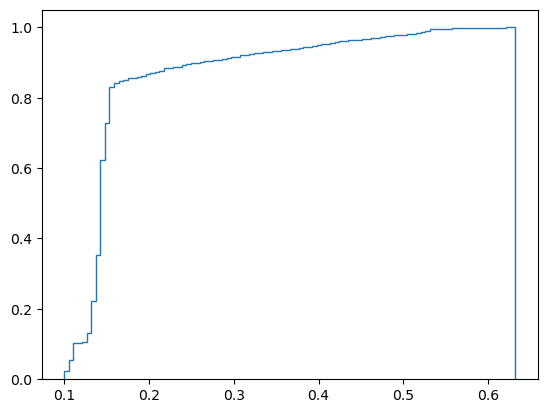

In [219]:
fig,ax = plt.subplots()
# ax.hist(weights,bins=100)
ax.hist(weights, bins=100, density=True, histtype="step",
                               cumulative=True, label="Cumulative histogram")
# ax.set_xlim(0)
# ax.set_yscale('log')
plt.show()

In [2]:
# import networkx as nx
# import matplotlib.pyplot as plt
# G = nx.read_graphml('eom-net_0p1_subclass_clusters_mst.graphml')

# pos = nx.nx_agraph.graphviz_layout(G, prog='neato')

# nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='lightblue', node_size=30)
# plt.title("Nodes associated with a structural cluster")
# plt.show()

In [ ]:

# Get identity hits smiles for all nodes
identity_smiles = nx.get_node_attributes(G, smiles_col)
nodes_with_hits = list(identity_smiles.keys())

# Get all node pairs within distance
neighbor_distance_matrix = distance_matrix <= max_node_distance
rows, cols = neighbor_distance_matrix.nonzero()
neighbor_pairs = np.array([rows, cols]).T

# # Define a function to compute jaccard bonds
# def compute_jaccard_bonds_parallel(args):
#     pair, nodes, nodes_with_hits, identity_smiles = args
#     node0 = nodes[pair[0]]
#     node1 = nodes[pair[1]]
    
#     if node0 not in nodes_with_hits or node1 not in nodes_with_hits:
#         return 0
#     else:
#         smiles0 = identity_smiles[node0]
#         smiles1 = identity_smiles[node1]
        
#         return compute_jaccard_bonds(smiles0, smiles1)
# neighbor_pairs[:3,:],nodes[:3],identity_smiles['0.0']
smiles_pairs = [(identity_smiles[nodes[pair[0]]],identity_smiles[nodes[pair[1]]],pair[0],pair[1]) for pair in neighbor_pairs]
smiles_pairs = [(smiles1, smiles2,pair0,pair1) for smiles1, smiles2, pair0,pair1 in smiles_pairs if isinstance(smiles1, str) and isinstance(smiles2, str)]
# compute_jaccard_bonds(smiles_pairs[0])
# results = []
# for i in smiles_pairs[:3000]:
    # results.append(compute_jaccard_bonds(i))

# with Pool(20) as pool:
#     mcs_results = pool.map(compute_jaccard_bonds, smiles_pairs[:1000])

from concurrent.futures import ThreadPoolExecutor
with ThreadPoolExecutor(max_workers=20) as executor:
    mcs_results = list(executor.map(compute_jaccard_bonds, smiles_pairs))


In [ ]:









# nonzero_jaccard_len = len([jaccard_bonds for jaccard_bonds in neighbor_jaccard_bonds if jaccard_bonds is not None])
# print(nonzero_jaccard_len)
min_mcs_difference
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
min_mcs_difference = 0.4

row_indices = [pair[2] for pair in smiles_pairs]
col_indices = [pair[3] for pair in smiles_pairs]

x = np.zeros((num_nodes, num_nodes))

x[row_indices,col_indices] = mcs_results
y = x[np.triu_indices(x.shape[0],1)]
y = 1 - y

# fig,ax = plt.subplots()
# dn1 = hierarchy.dendrogram(Z,ax=ax)
Z = hierarchy.linkage(y, method='single')

clusters = hierarchy.fcluster(Z, t=min_mcs_difference, criterion='distance')

# Add cluster labels to graph
cluster_dict = dict(zip(nodes, clusters))
nx.set_node_attributes(G, cluster_dict, 'mcs_structural_cluster_number')
# len(clusters),len(set(clusters))

cluster_counts = np.bincount(clusters)
print(len(clusters),len(set(clusters)),len(set(clusters[np.in1d(clusters,np.where(cluster_counts>1))])))




In [ ]:

import pandas as pd



original_index = nx.get_node_attributes(G, 'original_index')
mcs_structural_cluster_number = nx.get_node_attributes(G, 'mcs_structural_cluster_number')
smiles = nx.get_node_attributes(G,smiles_col)
node_id = {k:k for k in G.nodes()}

df = pd.DataFrame({'node_id':node_id,'smiles':smiles,'original_index': original_index, 'mcs_structural_cluster_number': mcs_structural_cluster_number})
df = df[pd.notna(df['smiles'])]
df = df.groupby('mcs_structural_cluster_number').filter(lambda x: len(x) >= 2)
df.sort_values('mcs_structural_cluster_number', inplace=True)
df.reset_index(drop=True, inplace=True)
dfs = [d for _,d in df.groupby('mcs_structural_cluster_number')]
out = []
for i,dd in enumerate(dfs):
    nodes = dd['node_id'].tolist()
    new_nodes = min_additional_subgraph(G, nodes)
    mols = [MolFromSmiles(s) for s in dd['smiles'].tolist()]
    res = rdFMCS.FindMCS(mols,timeout=120,ringMatchesRingOnly=True,threshold=0.8)
    num_bonds = [m.GetNumBonds() for m in mols]
    mcs = res.numBonds / np.min(num_bonds)
    # len(n),dd.shape[0],n,sorted(dd['node_id'].tolist())
    # dd['new_nodes'] = None
    temp = pd.DataFrame()
    temp['node_id'] = new_nodes 
    temp = pd.merge(temp,dd,on='node_id',how='outer')
    temp['mcs'] = mcs
    temp['mcs_structural_cluster_number'] = i
    temp['structural_pattern'] = res.smartsString
    temp['mols'] = [mols for _ in range(temp.shape[0])]
    # temp['mcs_structural_cluster_number'] = i
    temp.drop(columns=['original_index'])
    out.append(temp)


df = pd.concat(out)
df

In [ ]:
from rdkit import Chem
df_mol_cluster = df[['mcs_structural_cluster_number','structural_pattern','mols','mcs']].copy()

df_mol_cluster.drop_duplicates('mcs_structural_cluster_number',inplace=True)
df_mol_cluster.reset_index(drop=True,inplace=True)

df_mol_cluster['num_mols']= df_mol_cluster['mols'].apply(lambda x: len(x))

df_mol_cluster.sort_values('num_mols',inplace=True)

df_mol_cluster.reset_index(drop=True,inplace=True)
# p = df_mol_cluster.loc[0,'structural_pattern']
# mol = Chem.MolFromSmarts(p)
# s = Chem.MolToSmiles(mol)
# mol = Chem.MolFromSmiles(s)
# mol
df_mol_cluster


In [ ]:

pats = [Chem.MolToSmiles(Chem.MolFromSmarts(p)) for p in df_mol_cluster['structural_pattern'].tolist()]
mcs_results = []
for i,p1 in enumerate(pats):
    print(i)
    for j,p2 in enumerate(pats):
        if i > j:
            if (p1 is not None) & (p2 is not None):
                try:
                    mcs = compute_jaccard_bonds((p1, p2))
                except ValueError as e:
                    if str(e) == "molecule is None":
                        mcs = 0
                    else:
                        raise e
            else:
                mcs = 0
            mcs_results.append({'pat_1':i,'pat_2':j,'mcs':mcs})
            # print(p1,p2,Chem.MolFromSmiles(p1).HasSubstructMatch(Chem.MolFromSmiles(p2)))
mcs_results = pd.DataFrame(mcs_results)



In [ ]:
from scipy.cluster.hierarchy import dendrogram

x = mcs_results.pivot(index='pat_1',columns='pat_2',values='mcs')
x = x.values
# x = np.zeros((num_nodes, num_nodes))

# x[row_indices,col_indices] = mcs_results
y = x[np.tril_indices(x.shape[0],0)]
y = 1 - y

Z = hierarchy.linkage(y, method='ward')
clusters = hierarchy.fcluster(Z, t=4, criterion='maxclust')


# # Add cluster labels to graph
# cluster_dict = dict(zip(nodes, clusters))
# nx.set_node_attributes(G, cluster_dict, 'mcs_structural_cluster_number')
# # len(clusters),len(set(clusters))

# cluster_counts = np.bincount(clusters)
# print(len(clusters),len(set(clusters)),len(set(clusters[np.in1d(clusters,np.where(cluster_counts>1))])))
df_mol_cluster['mcs_higher_cluster'] = clusters


In [ ]:
import json
import json
import json
from collections import Counter

def get_most_common(classes):
    class_counts = Counter(classes)
    # Get the most common string
    most_common_class = class_counts.most_common(1)[0][0]
    return most_common_class

classyfire_dir = '/global/cfs/cdirs/metatlas/projects/classyfire_annotations/'
superclass_name = []
class_name = []
for i,row in df_mol_cluster.iterrows():
    superclasses = []
    classes = []
    for m in row['mols']:
        f = '%s.json'%Chem.MolToInchiKey(m)
        f = os.path.join(classyfire_dir,f)
        with open(f,'r') as fid:
            cf = fid.read()
        cf = json.loads(cf.strip())
        if isinstance(cf,str):
            cf = json.loads(cf)
        # cf_json = json.dumps(cf)
        if not 'superclass' in cf:
            cf['superclass'] = {'name':None}
            cf['class'] = {'name':None}
        superclasses.append(cf['superclass']['name'])
        classes.append(cf['class']['name'])
    # Count the occurrences of each string in the classes list
    classes = [c for c in classes if c is not None]
    superclasses = [c for c in superclasses if c is not None]
    if len(classes) == 0:
        class_name.append(None)
        superclass_name.append(None)
    else:    
        # Print the most common class
        class_name.append(get_most_common(classes))
        superclass_name.append(get_most_common(superclasses))
df_mol_cluster['superclass'] = superclass_name
df_mol_cluster['class'] = class_name
df_mol_cluster

In [ ]:
df_mol_cluster.value_counts('class')

In [ ]:


import os
import shutil

outdir = '/global/homes/b/bpb/repos/scndb/data/struct_clusters_quartered'
if os.path.exists(outdir):
    shutil.rmtree(outdir)
    # os.rmdir(outdir)
os.makedirs(outdir)


dfs = [d for _,d in df_mol_cluster.groupby('mcs_higher_cluster')]
for dd in dfs:
    mol_list = []
    my_legend = []
    for i,row in dd.iterrows():
        mol_list.extend(row['mols'])
        my_legend.extend(['%d'%row['mcs_structural_cluster_number'] for _ in range(len(row['mols']))])
    
    # Smarts pattern for common substructure
    pat = MolFromSmarts(dd['structural_pattern'].tolist()[0])

    image = MolsToGridImage(mol_list, molsPerRow=20, subImgSize=(300, 300), useSVG=True,maxMols=1000,legends=my_legend)
                            #  highlightAtomLists=highlist_list,highlightAtomColors=[highlight_color]*len(mols))

    # Display the image
    outfile = os.path.join(outdir,'{}.svg'.format(dd['mcs_higher_cluster'].tolist()[0]))
    with open(outfile,'w') as fid:
        fid.write(image.data)




# original_index = nx.get_node_attributes(G, 'original_index')
# mcs_structural_cluster_number = nx.get_node_attributes(G, 'mcs_structural_cluster_number')
# smiles = nx.get_node_attributes(G,smiles_col)

# df = pd.DataFrame({'smiles':smiles,'original_index': original_index, 'mcs_structural_cluster_number': mcs_structural_cluster_number})
# df = df[pd.notna(df['smiles'])]
# df = df.groupby('mcs_structural_cluster_number').filter(lambda x: len(x) >= 2)
# df.sort_values('mcs_structural_cluster_number', inplace=True)
# df = df[df['mcs_structural_cluster_number']>0]
# my_list = [MolFromSmiles(m) for m in df['smiles'].values]
# my_legend = ['%d'%m for m in df['mcs_structural_cluster_number'].values]
# image = MolsToGridImage(my_list, molsPerRow=10,maxMols=1000,legends=my_legend,useSVG=True)

# outfile = os.path.join(outdir,'AllStructuralClusters_massive.svg')
# with open(outfile,'w') as fid:
#     fid.write(image.data)


# shutil.make_archive('../data/structural_clusters_massive', 'zip', '.', outdir)


In [ ]:
a


node_id = {k:k for k in G.nodes()}
node_id = pd.Series(node_id)
node_id = node_id.to_frame()
node_id.columns = ['node_id']
node_id = pd.merge(node_id,df,on='node_id',how='left')
# node_id = node_id[['node_id','structural_pattern','mcs','mcs_structural_cluster_number']]
node_id['structural_pattern'] = node_id['structural_pattern'].fillna('')
node_id['mcs'] = node_id['mcs'].fillna(0)
node_id['mcs_structural_cluster_number'] = node_id['mcs_structural_cluster_number'].fillna(-1)
node_id['mcs_structural_cluster_number'] = node_id['mcs_structural_cluster_number'].astype(int)
node_id['structural_pattern'] = node_id['structural_pattern'].astype(str)
node_id['mcs'] = node_id['mcs'].astype(float)
node_id



In [ ]:


# Add cluster labels to graph
cluster_dict = dict(zip(node_id['node_id'].tolist(), node_id['structural_pattern'].tolist()))
nx.set_node_attributes(G, cluster_dict, 'mcs_structural_pattern')
cluster_dict = dict(zip(node_id['node_id'].tolist(), node_id['mcs'].tolist()))
nx.set_node_attributes(G, cluster_dict, 'mcs_similarity')
cluster_dict = dict(zip(node_id['node_id'].tolist(), node_id['mcs_structural_cluster_number'].tolist()))
nx.set_node_attributes(G, cluster_dict, 'mcs_structural_cluster_number')



In [ ]:
nx.write_graphml(G, 'eom-net-0p01-all-clust.graphml')


In [ ]:


import os
import shutil

outdir = '/global/homes/b/bpb/repos/scndb/data/struct_clusters_al-v2'
if os.path.exists(outdir):
    shutil.rmtree(outdir)
    # os.rmdir(outdir)
os.makedirs(outdir)


dfs = [d for _,d in df[df['mcs_structural_cluster_number']>0].groupby('mcs_structural_cluster_number')]
for dd in dfs:
    dd = dd[pd.notna(dd['smiles'])]
    # List of smiles
    smiles_list = dd['smiles'].tolist()

    # Smarts pattern for common substructure
    pat = MolFromSmarts(dd['structural_pattern'].tolist()[0])

    # Convert smiles to RDKit molecules
    mols = [MolFromSmiles(smiles) for smiles in smiles_list]

    highlight_list = [mol.GetSubstructMatch(pat) for mol in mols]
    my_legend = ['%d'%m for m in dd['mcs_structural_cluster_number'].values]
    highlist_list = highlight_list
    
    # [mol.GetSubstructMatch(pat) for mol in mols]
    # Generate common substructure image
    highlight_color = {i: (0, 1, 1) for mol in mols for i in mol.GetSubstructMatch(pat)}
    image = MolsToGridImage(mols, molsPerRow=5, subImgSize=(300, 300), useSVG=True,maxMols=1000,
                            legends=my_legend, highlightAtomLists=highlist_list,highlightAtomColors=[highlight_color]*len(mols))

    # Display the image
    outfile = os.path.join(outdir,'{}.svg'.format(dd['mcs_structural_cluster_number'].tolist()[0]))
    with open(outfile,'w') as fid:
        fid.write(image.data)




original_index = nx.get_node_attributes(G, 'original_index')
mcs_structural_cluster_number = nx.get_node_attributes(G, 'mcs_structural_cluster_number')
smiles = nx.get_node_attributes(G,smiles_col)

df = pd.DataFrame({'smiles':smiles,'original_index': original_index, 'mcs_structural_cluster_number': mcs_structural_cluster_number})
df = df[pd.notna(df['smiles'])]
df = df.groupby('mcs_structural_cluster_number').filter(lambda x: len(x) >= 2)
df.sort_values('mcs_structural_cluster_number', inplace=True)
df = df[df['mcs_structural_cluster_number']>0]
my_list = [MolFromSmiles(m) for m in df['smiles'].values]
my_legend = ['%d'%m for m in df['mcs_structural_cluster_number'].values]
image = MolsToGridImage(my_list, molsPerRow=10,maxMols=1000,legends=my_legend,useSVG=True)

outfile = os.path.join(outdir,'AllStructuralClusters_massive.svg')
with open(outfile,'w') as fid:
    fid.write(image.data)


shutil.make_archive('../data/structural_clusters_massive', 'zip', '.', outdir)


In [ ]:





original_index = nx.get_node_attributes(G, 'original_index')
mcs_structural_cluster_number = nx.get_node_attributes(G, 'mcs_structural_cluster_number')
smiles = nx.get_node_attributes(G,smiles_col)
node_id = {k:k for k in G.nodes()}

df = pd.DataFrame({'node_id':node_id,'smiles':smiles,'original_index': original_index, 'mcs_structural_cluster_number': mcs_structural_cluster_number})
df = df[pd.notna(df['smiles'])]
df = df.groupby('mcs_structural_cluster_number').filter(lambda x: len(x) >= 2)
df.sort_values('mcs_structural_cluster_number', inplace=True)
df.reset_index(drop=True, inplace=True)
dfs = [d for _,d in df.groupby('mcs_structural_cluster_number')]
out = []
for i,dd in enumerate(dfs):
    nodes = dd['node_id'].tolist()
    new_nodes = min_additional_subgraph(G, nodes)
    mols = [MolFromSmiles(s) for s in dd['smiles'].tolist()]
    res = rdFMCS.FindMCS(mols,timeout=120,ringMatchesRingOnly=True)
    num_bonds = [m.GetNumBonds() for m in mols]
    mcs = res.numBonds / np.min(num_bonds)
    # len(n),dd.shape[0],n,sorted(dd['node_id'].tolist())
    # dd['new_nodes'] = None
    temp = pd.DataFrame()
    temp['node_id'] = new_nodes 
    temp = pd.merge(temp,dd,on='node_id',how='outer')
    temp['mcs'] = mcs
    temp['mcs_structural_cluster_number'] = i
    temp['structural_pattern'] = res.smartsString
    # temp['mcs_structural_cluster_number'] = i
    temp.drop(columns=['original_index'])
    out.append(temp)


df = pd.concat(out)



In [ ]:
node_id = {k:k for k in G.nodes()}
node_id = pd.Series(node_id)
node_id = node_id.to_frame()
node_id.columns = ['node_id']
node_id = pd.merge(node_id,df,on='node_id',how='left')
# node_id = node_id[['node_id','structural_pattern','mcs','mcs_structural_cluster_number']]
node_id['structural_pattern'] = node_id['structural_pattern'].fillna('')
node_id['mcs'] = node_id['mcs'].fillna(0)
node_id['mcs_structural_cluster_number'] = node_id['mcs_structural_cluster_number'].fillna(-1)
node_id['mcs_structural_cluster_number'] = node_id['mcs_structural_cluster_number'].astype(int)
node_id['structural_pattern'] = node_id['structural_pattern'].astype(str)
node_id['mcs'] = node_id['mcs'].astype(float)
node_id

# Add cluster labels to graph
cluster_dict = dict(zip(node_id['node_id'].tolist(), node_id['structural_pattern'].tolist()))
nx.set_node_attributes(G, cluster_dict, 'mcs_structural_pattern')
cluster_dict = dict(zip(node_id['node_id'].tolist(), node_id['mcs'].tolist()))
nx.set_node_attributes(G, cluster_dict, 'mcs_similarity')
cluster_dict = dict(zip(node_id['node_id'].tolist(), node_id['mcs_structural_cluster_number'].tolist()))
nx.set_node_attributes(G, cluster_dict, 'mcs_structural_cluster_number')




In [ ]:
# df = pd.concat(out)
df['nl_spectrum'] = df.apply(lambda x: np.asarray([x['mdm_mz_vals'],x['mdm_i_vals']]),axis=1)

df['sum_frag_intensity'] = df['mdm_i_vals'].apply(lambda x: np.sum(x))
df['original_spectrum'] = df['nl_spectrum']#df.apply(lambda x: np.asarray([x['original_mz_vals'],x['original_i_vals']]),axis=1)

df.head()

In [ ]:
# good_files = merged_df.loc[merged_df['percent_greater'] < 40,'filename'].tolist()
# print(df.shape[0])
# df = df[df['filename'].isin(good_files)]
# print(df.shape[0])

In [ ]:
df['coisolated_precursor_count'].value_counts()

In [ ]:
df = df[df['sum_frag_intensity']>0]
df['num_mdm_frags'] = df['mdm_mz_vals'].apply(lambda x: len(x))

In [ ]:
df['num_mdm_frags'].min()

In [ ]:
ref,ref2 = wt.get_p2d2(deltas,mz_tol=mz_tol)

In [ ]:
out_dfs = wt.blink_score(df,ref,ref2)


In [ ]:
cols = ['rem_predicted_score','ref','query']
nl_hits = pd.merge(out_dfs[3][cols],ref2[['original_p2d2_index']],left_on='ref',right_index=True)
orig_hits = pd.merge(out_dfs[2][cols],ref[['original_p2d2_index']],left_on='ref',right_index=True)
nl_hits.drop(columns=['ref'],inplace=True)
orig_hits.drop(columns=['ref'],inplace=True)

temp = pd.merge(nl_hits,orig_hits,on=['query','original_p2d2_index'],how='outer',suffixes=('_original_rem','_nl_rem'))

temp['max_score'] = temp[['rem_predicted_score_original_rem','rem_predicted_score_nl_rem']].max(axis=1)
temp['best_match_method'] = temp[['rem_predicted_score_original_rem','rem_predicted_score_nl_rem']].idxmax(axis=1)
temp.sort_values('max_score',ascending=False,inplace=True)
temp = temp[temp['max_score']>0.01]  #filter on score

cols = ['name', 'inchi_key', 'smiles']

temp = pd.merge(temp,df[['original_index','coisolated_precursor_count']].add_suffix('_query'),left_on='query',right_index=True)

idx_isolated = (temp['coisolated_precursor_count_query']>1) & (temp['best_match_method']=='rem_predicted_score_original_rem')
temp = temp[~idx_isolated] #filter on co-isolated precursor

temp.sort_values('max_score',ascending=False,inplace=True)
temp = temp.groupby('query').head(1)
temp.reset_index(inplace=True,drop=True)

cols = ['rem_predicted_score_original_rem', 'rem_predicted_score_nl_rem', 'coisolated_precursor_count_query']
temp.drop(columns=cols,inplace=True)

cols = ['name', 'inchi_key', 'smiles','formula','precursor_mz','original_p2d2_index']
temp = pd.merge(temp,ref[cols],left_on='original_p2d2_index',right_on='original_p2d2_index',how='left')

df = pd.merge(df,temp.add_suffix('_analog'),left_on='original_index',right_on='original_index_query_analog',how='left')
# df.drop(columns=['original_index_query_analog','original_p2d2_index','query'],inplace=True)

cols = ['original_index_query_analog','query_analog']
df.drop(columns=cols,inplace=True)


cols = ['score','matches','ref','query']
nl_hits = pd.merge(out_dfs[1][cols],ref2[['original_p2d2_index']],left_on='ref',right_index=True)
orig_hits = pd.merge(out_dfs[0][cols],ref[['original_p2d2_index']],left_on='ref',right_index=True)
nl_hits.drop(columns=['ref'],inplace=True)
orig_hits.drop(columns=['ref'],inplace=True)

temp = pd.merge(nl_hits,orig_hits,on=['query','original_p2d2_index'],how='outer',suffixes=('_original','_nl'))

temp['max_score'] = temp[['score_original','score_nl']].max(axis=1)
temp['best_match_method'] = temp[['score_original','score_nl']].idxmax(axis=1)
temp.sort_values('max_score',ascending=False,inplace=True)
temp = temp[temp['max_score']>0.7]  #filter on score
temp['max_matches'] = 0
idx = temp['best_match_method']=='score_original'
temp.loc[idx,'max_matches'] = temp.loc[idx,'matches_original']
idx = temp['best_match_method']=='score_nl'
temp.loc[idx,'max_matches'] = temp.loc[idx,'matches_nl']
temp = temp[temp['max_matches']>=3]  #filter on matches

cols = ['score_original','matches_original', 'score_nl', 'matches_nl']
temp.drop(columns=cols,inplace=True)
temp = pd.merge(temp,df[['original_index','precursor_mz','coisolated_precursor_count']].add_suffix('_query'),left_on='query',right_index=True)

idx_isolated = (temp['coisolated_precursor_count_query']>1) & (temp['best_match_method']=='score_original')
temp = temp[~idx_isolated] #filter on isolated precursor

cols = ['name', 'inchi_key', 'smiles','formula','precursor_mz','original_p2d2_index']
temp = pd.merge(temp,ref[cols],left_on='original_p2d2_index',right_on='original_p2d2_index',how='left')

idx_precursor = (abs(temp['precursor_mz_query']-temp['precursor_mz'])<mz_tol)
temp = temp[idx_precursor] #filter on precursor m/z

temp.sort_values('max_score',ascending=False,inplace=True)

temp = temp.groupby('query').head(1)
temp.reset_index(inplace=True,drop=True)

df = pd.merge(df,temp.add_suffix('_identity'),left_on='original_index',right_on='original_index_query_identity',how='left')
# df.drop(columns=['original_index_query_analog','original_p2d2_index','query'],inplace=True)

cols = ['original_index_query_identity',
        'query_identity',
        'precursor_mz_query_identity',
        'coisolated_precursor_count_query_identity']
df.drop(columns=cols,inplace=True)


In [ ]:
# cols = ['original_p2d2_index_analog','nl_spectrum']
# cols = ['original_p2d2_index_identity','nl_spectrum']
# cols = ['original_p2d2_index_analog','spectrum']
cols = ['original_p2d2_index','spectrum']
df = pd.merge(df,ref[cols].add_suffix('_ref_identity'),left_on='original_p2d2_index_identity',right_on='original_p2d2_index_ref_identity',how='left')
df = pd.merge(df,ref[cols].add_suffix('_ref_analog'),left_on='original_p2d2_index_analog',right_on='original_p2d2_index_ref_analog',how='left')
drop = ['original_p2d2_index_ref_identity','original_p2d2_index_ref_analog']
df.drop(columns=drop,inplace=True)
cols = ['original_p2d2_index','nl_spectrum']
df = pd.merge(df,ref2[cols].add_suffix('_ref_identity'),left_on='original_p2d2_index_identity',right_on='original_p2d2_index_ref_identity',how='left')
df = pd.merge(df,ref2[cols].add_suffix('_ref_analog'),left_on='original_p2d2_index_analog',right_on='original_p2d2_index_ref_analog',how='left')
drop = ['original_p2d2_index_ref_identity','original_p2d2_index_ref_analog']
df.drop(columns=drop,inplace=True)


In [ ]:
print(len(df['predicted_formula'].unique()))

In [ ]:
# df.sort_values('num_mdm_frags',ascending=False,inplace=True)
# df.drop_duplicates('predicted_formula',inplace=True)
# df.reset_index(drop=True,inplace=True)

In [ ]:
print(df.shape)
df = df[pd.notna(df['predicted_formula'])]
print(df.shape)

In [ ]:
out.shape[0]

In [ ]:
df = wt.eliminate_duplicate_spectra(out,deltas,mz_tol=mz_tol,
                                similarity_cutoff=similarity_cutoff,
                                min_intensity_ratio=min_intensity_ratio)
df.reset_index(inplace=True,drop=True)
df.shape[0]

In [ ]:
df['coisolated_precursor_count'].value_counts()

In [ ]:


# rem_df = wt.do_remblink_networking(df,df,spectra_attr='buddy_spectrum')
rem_df = wt.do_remblink_networking(df,df,spectra_attr='nl_spectrum')
cols = ['ref','query','rem_predicted_score']
rem_df = rem_df[cols]
rem_df = rem_df[rem_df['rem_predicted_score']>0.1]


In [ ]:
formula_props = wt.get_formula_props(df,formula_key='predicted_formula')
df = pd.merge(df,formula_props,left_on='predicted_formula',right_on='formula',how='left')
df.reset_index(inplace=True,drop=True)
df.head()

In [ ]:
# p = pd.read_parquet('/global/cfs/cdirs/metatlas/projects/rawdata_for_scn/20181217_KBL_TM_Lakes_GEODES_All3_QE-HF_C18_USDAY46918_NEG_MSMS_68_GEO-TB-36-F_1_Rg80to1200-CE102040-0-1-S1_Run246.parquet')
# p

In [ ]:
# DOM net: (6283, 13884)
# Plant net: (3424, 4873)

In [ ]:
import networkx as nx
# # Create the graph from the similarity matrix
G = nx.from_pandas_edgelist(rem_df,source='ref',target='query',edge_attr='rem_predicted_score')
# (similarity_matrix > similarity_cutoff)
# # Add node data from ms2_df to G
cols = list(set([c for c in df.columns if not 'spect' in c]) - set(['obs','coisolated_precursor_mz_list','mol','filename', 'basename', 'experiment']))
cols = [c for c in cols if not 'mdm_' in c]
cols = [c for c in cols if not 'original_' in c]
# cols = cols + ['stable']
node_data = df[cols].to_dict(orient='index')

nx.set_node_attributes(G, node_data)
            
# print(len(G.nodes))
# print(len(G.edges))

# # Remove self-loops
G.remove_edges_from([(u, v) for u, v in G.edges() if u == v])         

# Remove isolates
G.remove_nodes_from(list(nx.isolates(G)))
print('nodes',len(G.nodes))
print('edges',len(G.edges))


In [ ]:
1+1

250000**0.5

In [ ]:
df['log_sum_frag_intensity'] = np.log10(df['sum_frag_intensity'])


In [ ]:
idx1 = (df['isin_fticr_formula'] == True) & (df['predicted_formula'].str.contains('S'))
idx2 = (df['isin_fticr_formula'] == False) & (df['predicted_formula'].str.contains('S'))
out = []
out.append((sum(idx1),sum(idx2),sum(idx1)+sum(idx2)))

idx1 = (df['isin_fticr_formula'] == True) & (df['predicted_formula'].str.contains('N'))
idx2 = (df['isin_fticr_formula'] == False) & (df['predicted_formula'].str.contains('N'))

out.append((sum(idx1),sum(idx2),sum(idx1)+sum(idx2)))

idx1 = (df['isin_fticr_formula'] == True) & (df['predicted_formula'].str.contains('P'))
idx2 = (df['isin_fticr_formula'] == False) & (df['predicted_formula'].str.contains('P'))

out.append((sum(idx1),sum(idx2),sum(idx1)+sum(idx2)))

idx1 = (df['isin_fticr_formula'] == True) & (~df['predicted_formula'].str.contains('P|N|S'))
idx2 = (df['isin_fticr_formula'] == False) & (~df['predicted_formula'].str.contains('P|N|S'))

out.append((sum(idx1),sum(idx2),sum(idx1)+sum(idx2)))
out = pd.DataFrame(out,columns=['FTICR','Not FTICR','Total'],index=['S','N','P','CHO'])
out['FTICR'] = out['FTICR'] / out['Total']
out['Not FTICR'] = out['Not FTICR'] / out['Total']
out



In [ ]:
column_types = df.dtypes
print(column_types)


In [ ]:
### ARE WE MISSING ANY FTICR FORMULA??????

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,6 ))
ax = ax.flatten()

# Filter rows where isin_fticr_formula is True
df_true = df[df['isin_fticr_formula']]

# Filter rows where isin_fticr_formula is False
df_false = df[~df['isin_fticr_formula']]

# Plot histogram for isin_fticr_formula=True
counter = 0
df['log_sum_frag_intensity'] = np.log10(df['sum_frag_intensity'])
cols = ['coisolated_precursor_count', 'num_mdm_frags','mass_error','log_sum_frag_intensity']
for c in cols:
    ax[counter].hist(df_true[c], bins=15, alpha=0.5, density=False,label='isin_fticr_formula=True')

    # Plot histogram for isin_fticr_formula=False
    ax[counter].hist(df_false[c], bins=15, alpha=0.5,density=False, label='isin_fticr_formula=False')

    # Set labels and title
    ax[counter].set_xlabel(c)
    ax[counter].set_ylabel('Frequency')
    ax[counter].legend()
    counter += 1
plt.tight_layout()
# ax.set_xlim(-0.001,0.001)
# Add legend


# Show the plot
plt.show()


In [ ]:
formula_df.columns

In [ ]:
cols = ['environment_type:aquatic', 'environment_type:soil',
       'environment_type:wetland', 'extraction_solvent:chloroform',
       'extraction_solvent:methanol-water', 'extraction_solvent:water',
       'ppl_extracted:False', 'ppl_extracted:True',
       'instrument_type:12 Tesla FT-ICR-MS',
       'instrument_type:15 Tesla FT-ICR-MS', 'mass_range:100-900',
       'mass_range:125-2000', 'mass_range:150-2000', 'mass_range:200-1200']
formula_df.loc[~formula_df['formula'].isin(df['predicted_formula']),cols].sum()

In [ ]:
def remove_complex_attributes(G):
    for node, data in G.nodes(data=True):
        complex_attributes = [key for key, value in data.items() if isinstance(value, (list, set, dict,object))]
        for attribute in complex_attributes:
            del G.nodes[node][attribute]
    return G
G = remove_complex_attributes(G) #it removes everything.
nx.write_graphml(G, 'eom-net-0p1-cutoff-cho.graphml')
# nx.write_graphml(G, 'plantmasst_0p1.graphml')
# 250000**0.5

In [ ]:
df.columns

In [ ]:
len(df['buddy'].unique())